# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

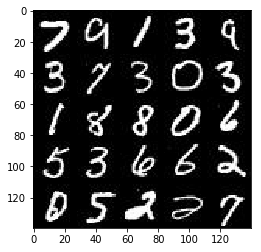

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

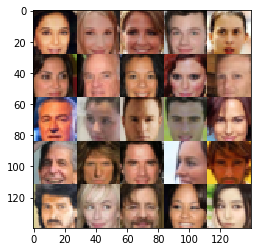

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    real_input = tf.placeholder(tf.float32, shape=(None, image_width, image_height, image_channels))
    z = tf.placeholder(tf.float32, shape=(None, z_dim))
    learning_rate = tf.placeholder(tf.float32)
    
    return real_input, z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha = 0.1
    
    with tf.variable_scope("discriminator", reuse=reuse):
        conv1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        conv1 = tf.maximum(alpha * conv1, conv1)
        
        conv2 = tf.layers.conv2d(conv1, 128, 5, strides=2, padding='same')
        conv2 = tf.layers.batch_normalization(conv2,  training=True)
        conv2 = tf.maximum(alpha * conv2, conv2)
        
        conv3 = tf.layers.conv2d(conv2, 256, 5, strides=2, padding='same')
        conv3 = tf.layers.batch_normalization(conv3,  training=True)
        conv3 = tf.maximum(alpha * conv3, conv3)

        flat  = tf.reshape(conv3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.1
    
    with tf.variable_scope("generator", reuse=not is_train):
        x = tf.layers.dense(z, 7*7*512)
        x = tf.reshape(x, (-1, 7, 7, 512))
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha * x, x)
        # 7x7x512
        
        conv1 = tf.layers.conv2d_transpose(x, 256, 5, strides=1, padding="same")
        conv1 = tf.layers.batch_normalization(conv1, training=is_train)
        conv1 = tf.maximum(alpha * conv1, conv1)
        # 14x14x256
        
        conv2 = tf.layers.conv2d_transpose(conv1, 128, 5, strides=2, padding="same")
        conv2 = tf.layers.batch_normalization(conv2, training=is_train)
        conv2 = tf.maximum(alpha * conv2, conv2)
        # 28x28x128
        
        logits = tf.layers.conv2d_transpose(conv2, out_channel_dim, 5, strides=2, padding="same")
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_real)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)): 
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    n_samples, width, height, channels = data_shape
    input_real, input_z, learn_rate = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    steps = 0
    show_every = 50
    print_every = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images *= 2
                # TODO: Train Model
                steps += 1
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})

                if steps % show_every == 0:
                    n_images = 16
                    show_generator_output(sess, n_images, input_z, channels, data_image_mode)

                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2... Discriminator Loss: 2.1812... Generator Loss: 0.1555
Epoch 0/2... Discriminator Loss: 2.9154... Generator Loss: 0.0931
Epoch 0/2... Discriminator Loss: 0.5854... Generator Loss: 1.4555
Epoch 0/2... Discriminator Loss: 0.8428... Generator Loss: 0.8310


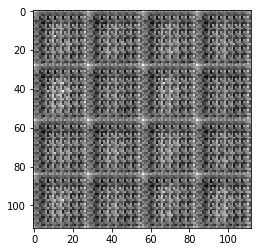

Epoch 0/2... Discriminator Loss: 0.8040... Generator Loss: 0.9245
Epoch 0/2... Discriminator Loss: 1.4345... Generator Loss: 0.5476
Epoch 0/2... Discriminator Loss: 2.0275... Generator Loss: 0.4137
Epoch 0/2... Discriminator Loss: 1.6237... Generator Loss: 0.3906
Epoch 0/2... Discriminator Loss: 0.8858... Generator Loss: 1.5418


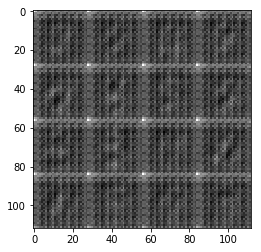

Epoch 0/2... Discriminator Loss: 1.3978... Generator Loss: 0.4559
Epoch 0/2... Discriminator Loss: 1.3605... Generator Loss: 0.5088
Epoch 0/2... Discriminator Loss: 1.7095... Generator Loss: 0.2849
Epoch 0/2... Discriminator Loss: 1.3399... Generator Loss: 0.8354
Epoch 0/2... Discriminator Loss: 1.2242... Generator Loss: 0.8167


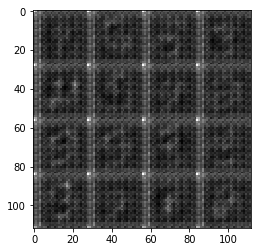

Epoch 0/2... Discriminator Loss: 1.0108... Generator Loss: 0.8185
Epoch 0/2... Discriminator Loss: 1.3066... Generator Loss: 0.6680
Epoch 0/2... Discriminator Loss: 0.8272... Generator Loss: 1.3227
Epoch 0/2... Discriminator Loss: 1.1099... Generator Loss: 0.5892
Epoch 0/2... Discriminator Loss: 0.7540... Generator Loss: 1.0635


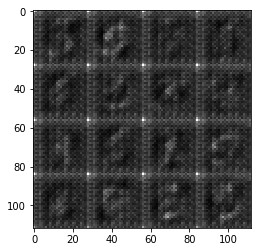

Epoch 0/2... Discriminator Loss: 0.9091... Generator Loss: 0.9679
Epoch 0/2... Discriminator Loss: 1.0507... Generator Loss: 0.7893
Epoch 0/2... Discriminator Loss: 1.0447... Generator Loss: 0.8825
Epoch 0/2... Discriminator Loss: 0.8383... Generator Loss: 1.1032
Epoch 0/2... Discriminator Loss: 1.0221... Generator Loss: 0.8876


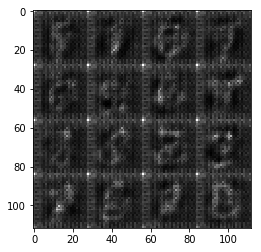

Epoch 0/2... Discriminator Loss: 1.0350... Generator Loss: 0.6227
Epoch 0/2... Discriminator Loss: 1.0776... Generator Loss: 0.5875
Epoch 0/2... Discriminator Loss: 0.8808... Generator Loss: 1.9275
Epoch 0/2... Discriminator Loss: 0.8964... Generator Loss: 1.0032
Epoch 0/2... Discriminator Loss: 1.1314... Generator Loss: 1.5269


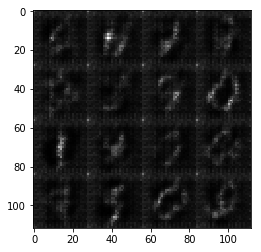

Epoch 0/2... Discriminator Loss: 1.0056... Generator Loss: 0.6604
Epoch 0/2... Discriminator Loss: 1.3229... Generator Loss: 0.3952
Epoch 0/2... Discriminator Loss: 0.8735... Generator Loss: 1.6043
Epoch 0/2... Discriminator Loss: 1.3598... Generator Loss: 0.4291
Epoch 0/2... Discriminator Loss: 0.9390... Generator Loss: 1.0240


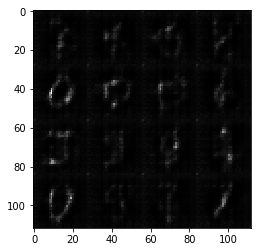

Epoch 0/2... Discriminator Loss: 0.9427... Generator Loss: 0.9109
Epoch 0/2... Discriminator Loss: 1.0983... Generator Loss: 1.1149
Epoch 0/2... Discriminator Loss: 0.9515... Generator Loss: 1.5567
Epoch 0/2... Discriminator Loss: 1.0443... Generator Loss: 1.5648
Epoch 0/2... Discriminator Loss: 0.9905... Generator Loss: 1.0013


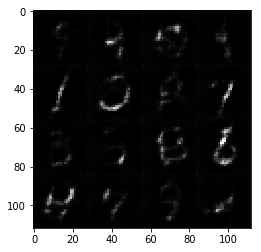

Epoch 0/2... Discriminator Loss: 0.9161... Generator Loss: 1.0699
Epoch 0/2... Discriminator Loss: 1.0255... Generator Loss: 1.2034
Epoch 0/2... Discriminator Loss: 1.4718... Generator Loss: 0.3325
Epoch 0/2... Discriminator Loss: 1.7838... Generator Loss: 0.2637
Epoch 0/2... Discriminator Loss: 1.0771... Generator Loss: 0.6403


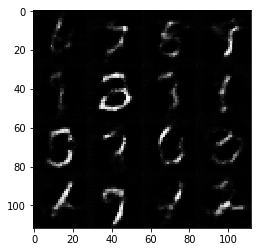

Epoch 0/2... Discriminator Loss: 1.2211... Generator Loss: 1.6673
Epoch 0/2... Discriminator Loss: 1.0697... Generator Loss: 1.0719
Epoch 0/2... Discriminator Loss: 1.0766... Generator Loss: 0.5720
Epoch 0/2... Discriminator Loss: 1.2352... Generator Loss: 1.2649
Epoch 0/2... Discriminator Loss: 0.9544... Generator Loss: 1.1976


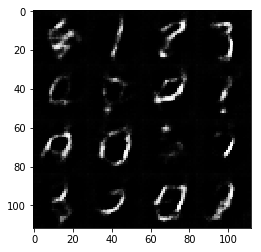

Epoch 0/2... Discriminator Loss: 1.4078... Generator Loss: 0.4363
Epoch 0/2... Discriminator Loss: 0.9535... Generator Loss: 1.5914
Epoch 0/2... Discriminator Loss: 1.1043... Generator Loss: 1.2215
Epoch 0/2... Discriminator Loss: 1.4216... Generator Loss: 0.4145
Epoch 0/2... Discriminator Loss: 0.9689... Generator Loss: 0.8327


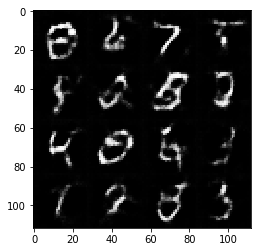

Epoch 0/2... Discriminator Loss: 0.8823... Generator Loss: 0.9952
Epoch 0/2... Discriminator Loss: 0.9520... Generator Loss: 0.9345
Epoch 0/2... Discriminator Loss: 1.2188... Generator Loss: 0.5963
Epoch 0/2... Discriminator Loss: 1.4982... Generator Loss: 0.3330
Epoch 0/2... Discriminator Loss: 0.9774... Generator Loss: 0.7913


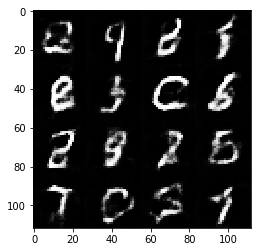

Epoch 0/2... Discriminator Loss: 0.8949... Generator Loss: 1.4203
Epoch 0/2... Discriminator Loss: 0.8782... Generator Loss: 1.0345
Epoch 0/2... Discriminator Loss: 0.9999... Generator Loss: 0.7507
Epoch 0/2... Discriminator Loss: 0.9441... Generator Loss: 0.8115
Epoch 0/2... Discriminator Loss: 1.0514... Generator Loss: 1.7916


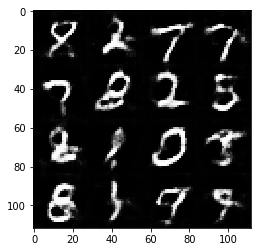

Epoch 0/2... Discriminator Loss: 1.1993... Generator Loss: 0.8514
Epoch 0/2... Discriminator Loss: 1.1479... Generator Loss: 0.7064
Epoch 0/2... Discriminator Loss: 1.2861... Generator Loss: 0.4112
Epoch 0/2... Discriminator Loss: 0.9135... Generator Loss: 0.8925
Epoch 0/2... Discriminator Loss: 1.0986... Generator Loss: 0.7991


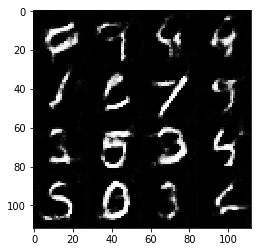

Epoch 0/2... Discriminator Loss: 1.0001... Generator Loss: 1.0578
Epoch 0/2... Discriminator Loss: 1.2257... Generator Loss: 1.1521
Epoch 0/2... Discriminator Loss: 1.4085... Generator Loss: 0.4245
Epoch 0/2... Discriminator Loss: 0.9866... Generator Loss: 1.4917
Epoch 0/2... Discriminator Loss: 1.1263... Generator Loss: 0.6167


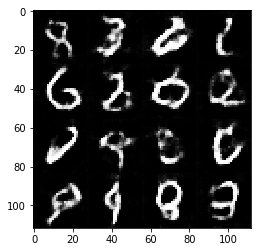

Epoch 0/2... Discriminator Loss: 0.8184... Generator Loss: 1.0885
Epoch 0/2... Discriminator Loss: 1.1324... Generator Loss: 0.5958
Epoch 0/2... Discriminator Loss: 1.0388... Generator Loss: 1.7227
Epoch 0/2... Discriminator Loss: 1.2975... Generator Loss: 0.4238
Epoch 0/2... Discriminator Loss: 1.0802... Generator Loss: 1.4888


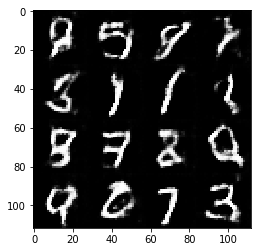

Epoch 0/2... Discriminator Loss: 0.9753... Generator Loss: 0.8832
Epoch 0/2... Discriminator Loss: 1.0778... Generator Loss: 0.5785
Epoch 0/2... Discriminator Loss: 0.9065... Generator Loss: 1.1292
Epoch 0/2... Discriminator Loss: 1.0058... Generator Loss: 0.7972
Epoch 0/2... Discriminator Loss: 1.2073... Generator Loss: 0.5134


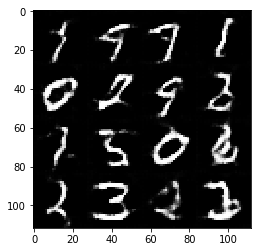

Epoch 0/2... Discriminator Loss: 0.7965... Generator Loss: 1.0108
Epoch 0/2... Discriminator Loss: 0.9867... Generator Loss: 0.8221
Epoch 0/2... Discriminator Loss: 0.8003... Generator Loss: 1.0492
Epoch 0/2... Discriminator Loss: 1.1144... Generator Loss: 1.3564
Epoch 0/2... Discriminator Loss: 1.2497... Generator Loss: 0.5248


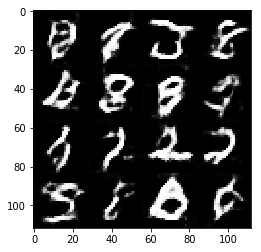

Epoch 0/2... Discriminator Loss: 0.8659... Generator Loss: 0.8958
Epoch 0/2... Discriminator Loss: 1.0661... Generator Loss: 0.6439
Epoch 0/2... Discriminator Loss: 0.8576... Generator Loss: 0.9917
Epoch 0/2... Discriminator Loss: 1.1973... Generator Loss: 0.7103
Epoch 0/2... Discriminator Loss: 0.9265... Generator Loss: 1.0320


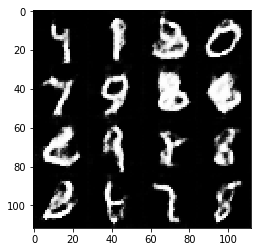

Epoch 0/2... Discriminator Loss: 1.0842... Generator Loss: 0.6985
Epoch 0/2... Discriminator Loss: 0.8328... Generator Loss: 0.9454
Epoch 0/2... Discriminator Loss: 0.9936... Generator Loss: 0.7158
Epoch 0/2... Discriminator Loss: 0.9639... Generator Loss: 0.9051
Epoch 0/2... Discriminator Loss: 1.0208... Generator Loss: 0.6785


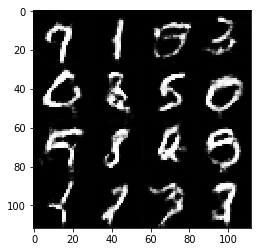

Epoch 0/2... Discriminator Loss: 1.5045... Generator Loss: 0.3279
Epoch 0/2... Discriminator Loss: 0.7932... Generator Loss: 1.1101
Epoch 0/2... Discriminator Loss: 0.8007... Generator Loss: 1.0621
Epoch 0/2... Discriminator Loss: 1.0985... Generator Loss: 0.5610
Epoch 0/2... Discriminator Loss: 1.2023... Generator Loss: 0.4692


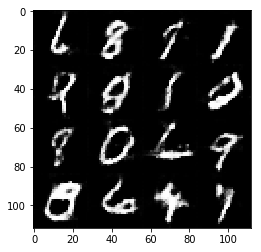

Epoch 0/2... Discriminator Loss: 1.0042... Generator Loss: 0.6725
Epoch 0/2... Discriminator Loss: 0.9979... Generator Loss: 1.2364
Epoch 0/2... Discriminator Loss: 1.4889... Generator Loss: 0.3809
Epoch 0/2... Discriminator Loss: 1.0770... Generator Loss: 0.6050
Epoch 0/2... Discriminator Loss: 1.6435... Generator Loss: 0.2869


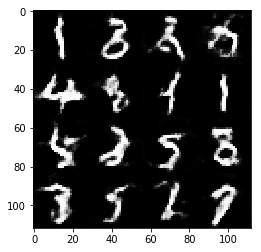

Epoch 0/2... Discriminator Loss: 1.3925... Generator Loss: 0.3922
Epoch 0/2... Discriminator Loss: 1.4692... Generator Loss: 0.3798
Epoch 0/2... Discriminator Loss: 1.1850... Generator Loss: 0.9288
Epoch 0/2... Discriminator Loss: 1.1480... Generator Loss: 0.5830
Epoch 0/2... Discriminator Loss: 1.1438... Generator Loss: 0.5682


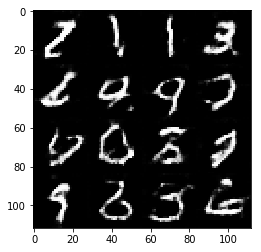

Epoch 0/2... Discriminator Loss: 0.8153... Generator Loss: 1.0366
Epoch 0/2... Discriminator Loss: 1.8830... Generator Loss: 0.2084
Epoch 0/2... Discriminator Loss: 0.7539... Generator Loss: 1.5477
Epoch 0/2... Discriminator Loss: 0.7756... Generator Loss: 1.1884
Epoch 0/2... Discriminator Loss: 0.8870... Generator Loss: 0.8985


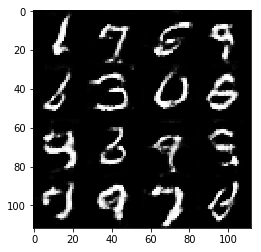

Epoch 0/2... Discriminator Loss: 1.9943... Generator Loss: 0.2067
Epoch 0/2... Discriminator Loss: 1.1440... Generator Loss: 0.6190
Epoch 0/2... Discriminator Loss: 0.9540... Generator Loss: 0.7558
Epoch 0/2... Discriminator Loss: 0.8972... Generator Loss: 1.8773
Epoch 0/2... Discriminator Loss: 0.9439... Generator Loss: 0.7263


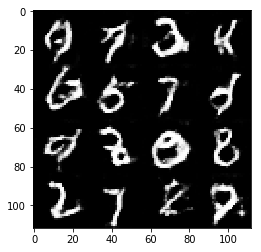

Epoch 0/2... Discriminator Loss: 1.2831... Generator Loss: 0.4076
Epoch 0/2... Discriminator Loss: 0.9518... Generator Loss: 0.7553
Epoch 0/2... Discriminator Loss: 0.8888... Generator Loss: 0.8425
Epoch 0/2... Discriminator Loss: 1.1262... Generator Loss: 1.7349
Epoch 0/2... Discriminator Loss: 1.1652... Generator Loss: 0.5873


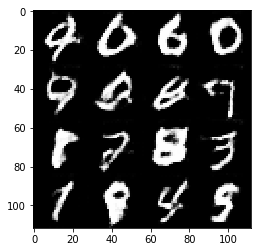

Epoch 0/2... Discriminator Loss: 0.7091... Generator Loss: 1.2140
Epoch 0/2... Discriminator Loss: 1.0720... Generator Loss: 0.6579
Epoch 0/2... Discriminator Loss: 0.6994... Generator Loss: 1.2622
Epoch 0/2... Discriminator Loss: 0.8708... Generator Loss: 1.0237
Epoch 0/2... Discriminator Loss: 0.7683... Generator Loss: 1.2681


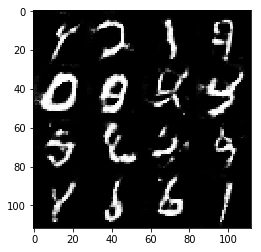

Epoch 0/2... Discriminator Loss: 1.0112... Generator Loss: 0.7027
Epoch 0/2... Discriminator Loss: 1.3883... Generator Loss: 0.3897
Epoch 0/2... Discriminator Loss: 0.8105... Generator Loss: 1.2139
Epoch 0/2... Discriminator Loss: 0.7148... Generator Loss: 0.9492
Epoch 0/2... Discriminator Loss: 1.4607... Generator Loss: 0.3811


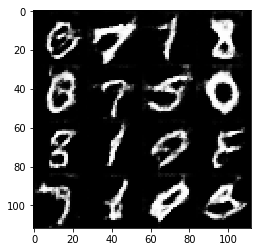

Epoch 0/2... Discriminator Loss: 0.8780... Generator Loss: 0.8344
Epoch 0/2... Discriminator Loss: 0.9777... Generator Loss: 0.8020
Epoch 0/2... Discriminator Loss: 0.8171... Generator Loss: 0.9281
Epoch 0/2... Discriminator Loss: 0.7470... Generator Loss: 1.3195
Epoch 0/2... Discriminator Loss: 1.0863... Generator Loss: 0.5871


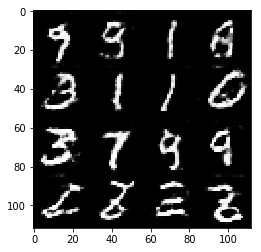

Epoch 0/2... Discriminator Loss: 0.7388... Generator Loss: 0.9949
Epoch 0/2... Discriminator Loss: 2.0483... Generator Loss: 0.2212
Epoch 0/2... Discriminator Loss: 0.8700... Generator Loss: 0.8488
Epoch 0/2... Discriminator Loss: 1.2363... Generator Loss: 0.5163
Epoch 0/2... Discriminator Loss: 1.2312... Generator Loss: 0.5425


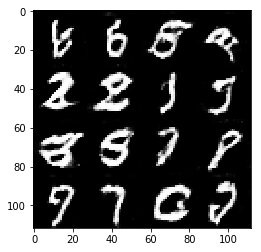

Epoch 0/2... Discriminator Loss: 1.1314... Generator Loss: 0.5919
Epoch 0/2... Discriminator Loss: 0.8915... Generator Loss: 0.8134
Epoch 0/2... Discriminator Loss: 0.7470... Generator Loss: 1.2310
Epoch 0/2... Discriminator Loss: 1.1187... Generator Loss: 0.5575
Epoch 0/2... Discriminator Loss: 0.7458... Generator Loss: 1.0546


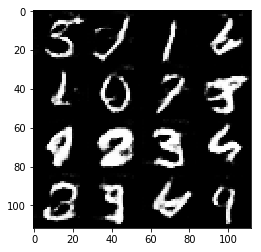

Epoch 0/2... Discriminator Loss: 0.9917... Generator Loss: 0.7253
Epoch 0/2... Discriminator Loss: 0.6904... Generator Loss: 1.7147
Epoch 0/2... Discriminator Loss: 1.0175... Generator Loss: 1.2879
Epoch 0/2... Discriminator Loss: 0.7239... Generator Loss: 1.0831
Epoch 0/2... Discriminator Loss: 1.1534... Generator Loss: 0.5206


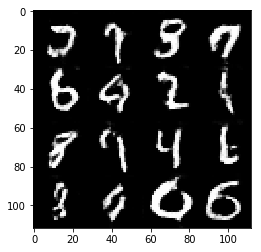

Epoch 0/2... Discriminator Loss: 0.8241... Generator Loss: 1.4099
Epoch 0/2... Discriminator Loss: 0.7802... Generator Loss: 0.8774
Epoch 0/2... Discriminator Loss: 1.1142... Generator Loss: 0.5497
Epoch 0/2... Discriminator Loss: 1.0467... Generator Loss: 0.6542
Epoch 0/2... Discriminator Loss: 0.8594... Generator Loss: 0.8520


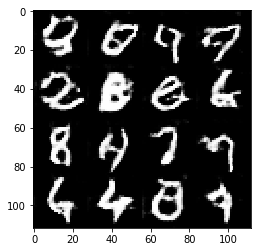

Epoch 0/2... Discriminator Loss: 1.1408... Generator Loss: 0.5252
Epoch 0/2... Discriminator Loss: 1.0928... Generator Loss: 0.6064
Epoch 0/2... Discriminator Loss: 1.3332... Generator Loss: 0.4843
Epoch 0/2... Discriminator Loss: 0.8099... Generator Loss: 1.3654
Epoch 0/2... Discriminator Loss: 1.3323... Generator Loss: 0.4023


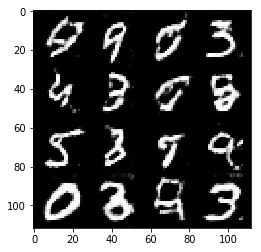

Epoch 0/2... Discriminator Loss: 1.0588... Generator Loss: 0.6039
Epoch 0/2... Discriminator Loss: 0.9254... Generator Loss: 0.7394
Epoch 0/2... Discriminator Loss: 1.3293... Generator Loss: 0.4645
Epoch 0/2... Discriminator Loss: 1.4233... Generator Loss: 0.3901
Epoch 0/2... Discriminator Loss: 0.8811... Generator Loss: 0.8454


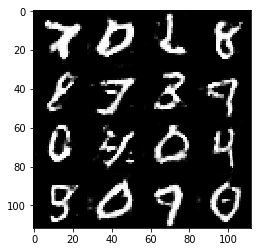

Epoch 0/2... Discriminator Loss: 0.7518... Generator Loss: 0.9995
Epoch 0/2... Discriminator Loss: 1.2791... Generator Loss: 0.4830
Epoch 0/2... Discriminator Loss: 0.5885... Generator Loss: 1.5251
Epoch 0/2... Discriminator Loss: 0.9081... Generator Loss: 0.7688
Epoch 0/2... Discriminator Loss: 1.0218... Generator Loss: 0.6111


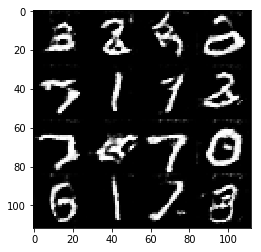

Epoch 0/2... Discriminator Loss: 1.8310... Generator Loss: 0.2569
Epoch 0/2... Discriminator Loss: 1.0112... Generator Loss: 0.6697
Epoch 0/2... Discriminator Loss: 1.7321... Generator Loss: 0.2605
Epoch 0/2... Discriminator Loss: 1.3785... Generator Loss: 0.4316
Epoch 0/2... Discriminator Loss: 0.9093... Generator Loss: 0.7449


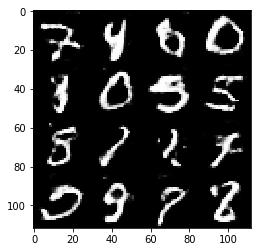

Epoch 0/2... Discriminator Loss: 0.6588... Generator Loss: 1.6661
Epoch 0/2... Discriminator Loss: 0.9867... Generator Loss: 0.7542
Epoch 0/2... Discriminator Loss: 1.0314... Generator Loss: 0.6832
Epoch 1/2... Discriminator Loss: 0.7953... Generator Loss: 0.9051
Epoch 1/2... Discriminator Loss: 0.5179... Generator Loss: 1.9252


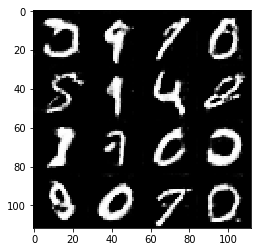

Epoch 1/2... Discriminator Loss: 0.6370... Generator Loss: 1.5113
Epoch 1/2... Discriminator Loss: 0.9410... Generator Loss: 0.8142
Epoch 1/2... Discriminator Loss: 0.7386... Generator Loss: 0.9614
Epoch 1/2... Discriminator Loss: 0.5439... Generator Loss: 2.9334
Epoch 1/2... Discriminator Loss: 0.8833... Generator Loss: 1.1638


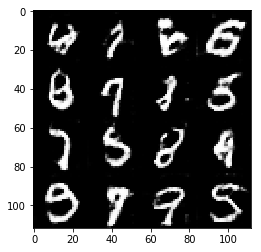

Epoch 1/2... Discriminator Loss: 1.2060... Generator Loss: 0.5171
Epoch 1/2... Discriminator Loss: 0.5760... Generator Loss: 1.8288
Epoch 1/2... Discriminator Loss: 0.7001... Generator Loss: 0.9816
Epoch 1/2... Discriminator Loss: 1.0877... Generator Loss: 0.7367
Epoch 1/2... Discriminator Loss: 0.8614... Generator Loss: 0.8067


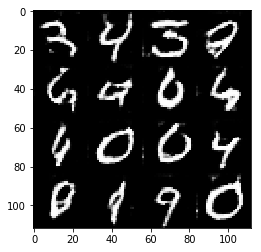

Epoch 1/2... Discriminator Loss: 0.6472... Generator Loss: 1.2102
Epoch 1/2... Discriminator Loss: 1.1537... Generator Loss: 0.5452
Epoch 1/2... Discriminator Loss: 1.6169... Generator Loss: 0.3194
Epoch 1/2... Discriminator Loss: 0.3385... Generator Loss: 2.4919
Epoch 1/2... Discriminator Loss: 0.4512... Generator Loss: 1.4801


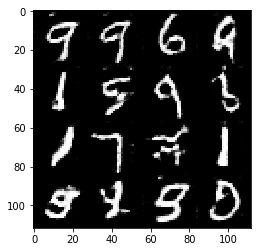

Epoch 1/2... Discriminator Loss: 1.4063... Generator Loss: 0.4030
Epoch 1/2... Discriminator Loss: 0.8583... Generator Loss: 1.4888
Epoch 1/2... Discriminator Loss: 0.6168... Generator Loss: 1.2163
Epoch 1/2... Discriminator Loss: 1.0973... Generator Loss: 0.6492
Epoch 1/2... Discriminator Loss: 0.6001... Generator Loss: 1.2613


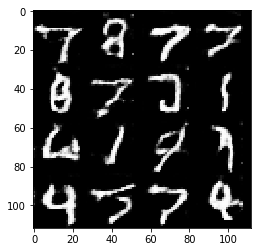

Epoch 1/2... Discriminator Loss: 0.9471... Generator Loss: 0.7915
Epoch 1/2... Discriminator Loss: 0.8983... Generator Loss: 0.7655
Epoch 1/2... Discriminator Loss: 0.8366... Generator Loss: 0.8566
Epoch 1/2... Discriminator Loss: 0.8110... Generator Loss: 0.8291
Epoch 1/2... Discriminator Loss: 0.6756... Generator Loss: 1.1056


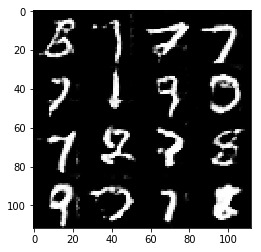

Epoch 1/2... Discriminator Loss: 1.2765... Generator Loss: 0.4753
Epoch 1/2... Discriminator Loss: 0.7882... Generator Loss: 0.8841
Epoch 1/2... Discriminator Loss: 1.0818... Generator Loss: 0.6441
Epoch 1/2... Discriminator Loss: 0.9803... Generator Loss: 0.7550
Epoch 1/2... Discriminator Loss: 0.8444... Generator Loss: 0.7814


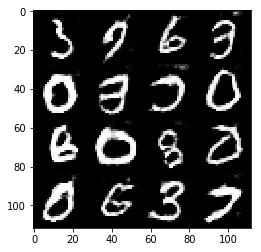

Epoch 1/2... Discriminator Loss: 0.7023... Generator Loss: 0.8897
Epoch 1/2... Discriminator Loss: 0.7098... Generator Loss: 1.5704
Epoch 1/2... Discriminator Loss: 0.8954... Generator Loss: 0.7260
Epoch 1/2... Discriminator Loss: 0.7742... Generator Loss: 0.8978
Epoch 1/2... Discriminator Loss: 0.6004... Generator Loss: 1.1258


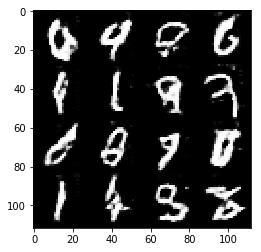

Epoch 1/2... Discriminator Loss: 0.4844... Generator Loss: 1.5668
Epoch 1/2... Discriminator Loss: 1.0711... Generator Loss: 0.6149
Epoch 1/2... Discriminator Loss: 0.9411... Generator Loss: 0.7845
Epoch 1/2... Discriminator Loss: 0.6990... Generator Loss: 1.0502
Epoch 1/2... Discriminator Loss: 0.8864... Generator Loss: 2.6656


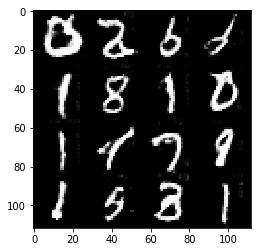

Epoch 1/2... Discriminator Loss: 1.8054... Generator Loss: 0.3938
Epoch 1/2... Discriminator Loss: 0.8624... Generator Loss: 0.7260
Epoch 1/2... Discriminator Loss: 0.7016... Generator Loss: 1.2753
Epoch 1/2... Discriminator Loss: 1.1570... Generator Loss: 0.5094
Epoch 1/2... Discriminator Loss: 0.7285... Generator Loss: 0.9587


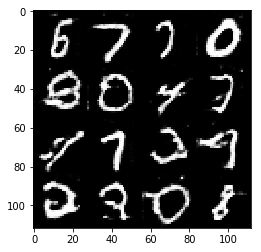

Epoch 1/2... Discriminator Loss: 0.6291... Generator Loss: 1.7612
Epoch 1/2... Discriminator Loss: 0.7777... Generator Loss: 1.0305
Epoch 1/2... Discriminator Loss: 0.7032... Generator Loss: 2.6226
Epoch 1/2... Discriminator Loss: 0.9981... Generator Loss: 0.6688
Epoch 1/2... Discriminator Loss: 1.0724... Generator Loss: 0.5480


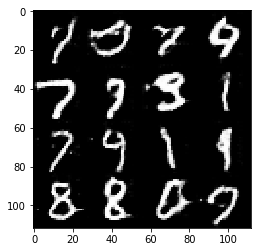

Epoch 1/2... Discriminator Loss: 0.8569... Generator Loss: 0.8430
Epoch 1/2... Discriminator Loss: 0.6827... Generator Loss: 1.0926
Epoch 1/2... Discriminator Loss: 0.9062... Generator Loss: 0.7492
Epoch 1/2... Discriminator Loss: 1.3861... Generator Loss: 0.3738
Epoch 1/2... Discriminator Loss: 0.8205... Generator Loss: 0.7456


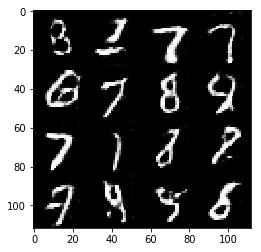

Epoch 1/2... Discriminator Loss: 0.7755... Generator Loss: 0.9846
Epoch 1/2... Discriminator Loss: 1.4369... Generator Loss: 0.3398
Epoch 1/2... Discriminator Loss: 0.4987... Generator Loss: 1.4264
Epoch 1/2... Discriminator Loss: 2.3122... Generator Loss: 0.1894


In [ ]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1... Discriminator Loss: 1.4491... Generator Loss: 0.4614
Epoch 0/1... Discriminator Loss: 1.0552... Generator Loss: 0.6433
Epoch 0/1... Discriminator Loss: 1.0407... Generator Loss: 0.5742
Epoch 0/1... Discriminator Loss: 0.2872... Generator Loss: 4.8020


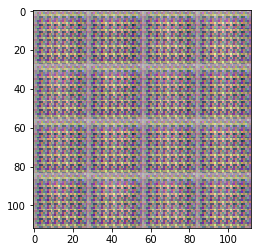

Epoch 0/1... Discriminator Loss: 0.3000... Generator Loss: 2.1596
Epoch 0/1... Discriminator Loss: 0.3814... Generator Loss: 1.6817
Epoch 0/1... Discriminator Loss: 0.9528... Generator Loss: 0.6815
Epoch 0/1... Discriminator Loss: 0.6190... Generator Loss: 1.5063
Epoch 0/1... Discriminator Loss: 0.9466... Generator Loss: 1.1975


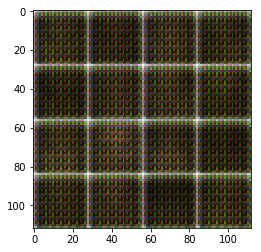

Epoch 0/1... Discriminator Loss: 0.6826... Generator Loss: 1.6606
Epoch 0/1... Discriminator Loss: 0.5112... Generator Loss: 1.4484
Epoch 0/1... Discriminator Loss: 0.7887... Generator Loss: 0.8444
Epoch 0/1... Discriminator Loss: 1.2700... Generator Loss: 0.4842
Epoch 0/1... Discriminator Loss: 0.9146... Generator Loss: 0.8610


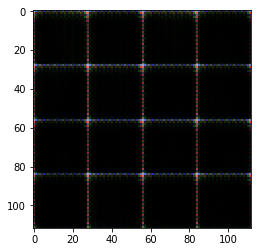

Epoch 0/1... Discriminator Loss: 1.1431... Generator Loss: 0.9200
Epoch 0/1... Discriminator Loss: 0.7238... Generator Loss: 1.3677
Epoch 0/1... Discriminator Loss: 1.5109... Generator Loss: 0.3549
Epoch 0/1... Discriminator Loss: 0.9780... Generator Loss: 1.4219
Epoch 0/1... Discriminator Loss: 1.3068... Generator Loss: 1.3174


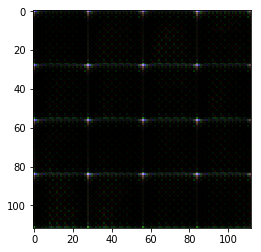

Epoch 0/1... Discriminator Loss: 0.8916... Generator Loss: 1.1477
Epoch 0/1... Discriminator Loss: 1.1964... Generator Loss: 0.7429
Epoch 0/1... Discriminator Loss: 0.9131... Generator Loss: 0.8222
Epoch 0/1... Discriminator Loss: 1.1088... Generator Loss: 0.9727
Epoch 0/1... Discriminator Loss: 0.9867... Generator Loss: 0.8324


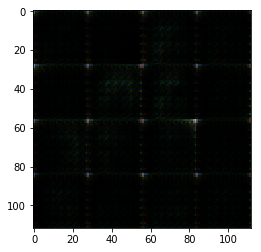

Epoch 0/1... Discriminator Loss: 0.9717... Generator Loss: 0.9941
Epoch 0/1... Discriminator Loss: 1.0196... Generator Loss: 1.0362
Epoch 0/1... Discriminator Loss: 1.1158... Generator Loss: 0.9096
Epoch 0/1... Discriminator Loss: 0.7187... Generator Loss: 1.4262
Epoch 0/1... Discriminator Loss: 1.4246... Generator Loss: 0.3810


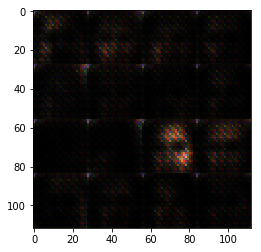

Epoch 0/1... Discriminator Loss: 0.8998... Generator Loss: 1.1777
Epoch 0/1... Discriminator Loss: 1.0525... Generator Loss: 0.8771
Epoch 0/1... Discriminator Loss: 1.0433... Generator Loss: 0.7639
Epoch 0/1... Discriminator Loss: 1.2369... Generator Loss: 0.9336
Epoch 0/1... Discriminator Loss: 1.2117... Generator Loss: 0.5521


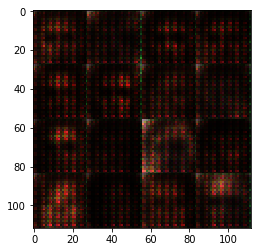

Epoch 0/1... Discriminator Loss: 1.2164... Generator Loss: 0.6135
Epoch 0/1... Discriminator Loss: 1.2512... Generator Loss: 0.4993
Epoch 0/1... Discriminator Loss: 1.7040... Generator Loss: 0.5483
Epoch 0/1... Discriminator Loss: 1.1451... Generator Loss: 0.7576
Epoch 0/1... Discriminator Loss: 1.7369... Generator Loss: 0.3203


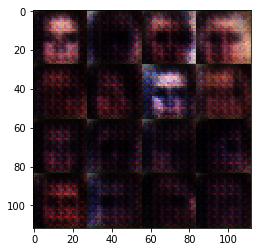

Epoch 0/1... Discriminator Loss: 1.4444... Generator Loss: 0.4268
Epoch 0/1... Discriminator Loss: 1.4284... Generator Loss: 0.4666
Epoch 0/1... Discriminator Loss: 1.4095... Generator Loss: 0.4875
Epoch 0/1... Discriminator Loss: 1.5463... Generator Loss: 0.4285
Epoch 0/1... Discriminator Loss: 1.7146... Generator Loss: 0.4748


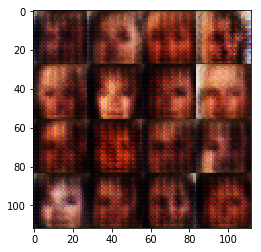

Epoch 0/1... Discriminator Loss: 1.5292... Generator Loss: 0.5161
Epoch 0/1... Discriminator Loss: 1.2868... Generator Loss: 1.0431
Epoch 0/1... Discriminator Loss: 1.2228... Generator Loss: 1.2377
Epoch 0/1... Discriminator Loss: 1.2122... Generator Loss: 0.8974
Epoch 0/1... Discriminator Loss: 1.2979... Generator Loss: 0.9572


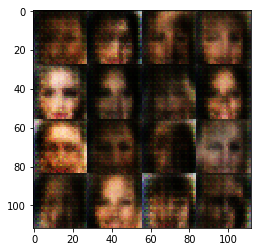

Epoch 0/1... Discriminator Loss: 1.5442... Generator Loss: 0.4596
Epoch 0/1... Discriminator Loss: 1.7926... Generator Loss: 0.2721
Epoch 0/1... Discriminator Loss: 1.3009... Generator Loss: 0.5938
Epoch 0/1... Discriminator Loss: 1.2387... Generator Loss: 1.0062
Epoch 0/1... Discriminator Loss: 1.2608... Generator Loss: 1.1689


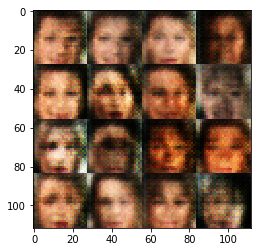

Epoch 0/1... Discriminator Loss: 1.2882... Generator Loss: 0.6727
Epoch 0/1... Discriminator Loss: 1.3986... Generator Loss: 0.5217
Epoch 0/1... Discriminator Loss: 1.2163... Generator Loss: 0.7732
Epoch 0/1... Discriminator Loss: 1.3752... Generator Loss: 0.7358
Epoch 0/1... Discriminator Loss: 1.2569... Generator Loss: 0.5753


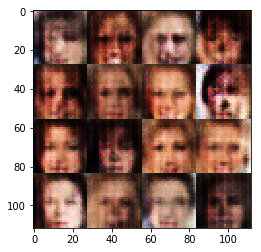

Epoch 0/1... Discriminator Loss: 1.2810... Generator Loss: 0.7509
Epoch 0/1... Discriminator Loss: 1.2543... Generator Loss: 0.8452
Epoch 0/1... Discriminator Loss: 1.2067... Generator Loss: 0.9503
Epoch 0/1... Discriminator Loss: 1.4152... Generator Loss: 0.6095
Epoch 0/1... Discriminator Loss: 1.1822... Generator Loss: 0.9063


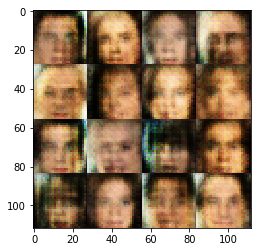

Epoch 0/1... Discriminator Loss: 1.1478... Generator Loss: 0.6351
Epoch 0/1... Discriminator Loss: 1.3368... Generator Loss: 0.5075
Epoch 0/1... Discriminator Loss: 1.2207... Generator Loss: 0.6877
Epoch 0/1... Discriminator Loss: 1.0416... Generator Loss: 1.0309
Epoch 0/1... Discriminator Loss: 1.7460... Generator Loss: 0.3722


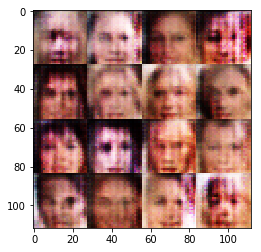

Epoch 0/1... Discriminator Loss: 1.1785... Generator Loss: 0.9153
Epoch 0/1... Discriminator Loss: 1.2680... Generator Loss: 0.5871
Epoch 0/1... Discriminator Loss: 1.6838... Generator Loss: 0.3437
Epoch 0/1... Discriminator Loss: 1.1313... Generator Loss: 0.6547
Epoch 0/1... Discriminator Loss: 1.4902... Generator Loss: 0.6154


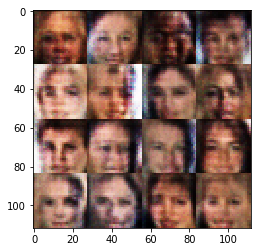

Epoch 0/1... Discriminator Loss: 1.2980... Generator Loss: 0.5629
Epoch 0/1... Discriminator Loss: 1.3673... Generator Loss: 0.7992
Epoch 0/1... Discriminator Loss: 1.4679... Generator Loss: 0.6062
Epoch 0/1... Discriminator Loss: 1.3739... Generator Loss: 0.5222
Epoch 0/1... Discriminator Loss: 1.1968... Generator Loss: 0.5282


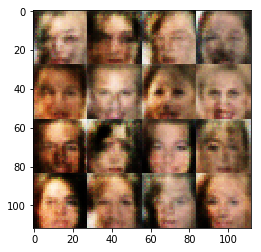

Epoch 0/1... Discriminator Loss: 1.3125... Generator Loss: 0.8335
Epoch 0/1... Discriminator Loss: 1.4317... Generator Loss: 0.6211
Epoch 0/1... Discriminator Loss: 1.4897... Generator Loss: 0.4437
Epoch 0/1... Discriminator Loss: 1.0084... Generator Loss: 0.9691
Epoch 0/1... Discriminator Loss: 1.2518... Generator Loss: 0.9356


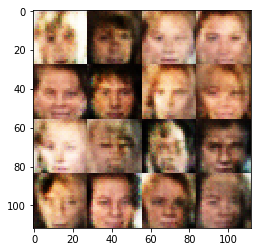

Epoch 0/1... Discriminator Loss: 1.2852... Generator Loss: 0.7299
Epoch 0/1... Discriminator Loss: 0.8539... Generator Loss: 1.0376
Epoch 0/1... Discriminator Loss: 1.2874... Generator Loss: 0.6763
Epoch 0/1... Discriminator Loss: 1.2668... Generator Loss: 0.5673
Epoch 0/1... Discriminator Loss: 1.2622... Generator Loss: 0.6733


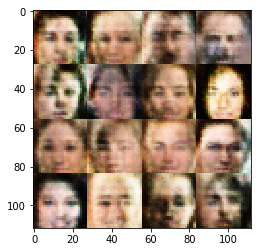

Epoch 0/1... Discriminator Loss: 1.2664... Generator Loss: 1.0067
Epoch 0/1... Discriminator Loss: 1.2313... Generator Loss: 0.5424
Epoch 0/1... Discriminator Loss: 1.3491... Generator Loss: 0.4931
Epoch 0/1... Discriminator Loss: 1.2216... Generator Loss: 0.7322
Epoch 0/1... Discriminator Loss: 1.0355... Generator Loss: 0.8874


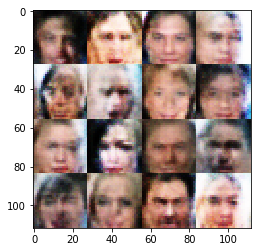

Epoch 0/1... Discriminator Loss: 1.1005... Generator Loss: 0.7323
Epoch 0/1... Discriminator Loss: 1.2885... Generator Loss: 0.8964
Epoch 0/1... Discriminator Loss: 1.1837... Generator Loss: 0.7559
Epoch 0/1... Discriminator Loss: 1.1955... Generator Loss: 0.9308
Epoch 0/1... Discriminator Loss: 1.1381... Generator Loss: 0.5302


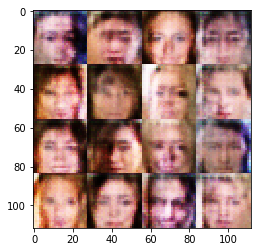

Epoch 0/1... Discriminator Loss: 0.9313... Generator Loss: 0.7659
Epoch 0/1... Discriminator Loss: 1.3144... Generator Loss: 0.5068
Epoch 0/1... Discriminator Loss: 1.3347... Generator Loss: 0.6602
Epoch 0/1... Discriminator Loss: 1.3156... Generator Loss: 0.6132
Epoch 0/1... Discriminator Loss: 1.2077... Generator Loss: 0.5848


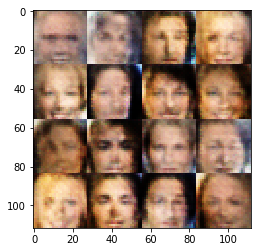

Epoch 0/1... Discriminator Loss: 1.5661... Generator Loss: 0.4868
Epoch 0/1... Discriminator Loss: 1.1681... Generator Loss: 0.9491
Epoch 0/1... Discriminator Loss: 1.3154... Generator Loss: 1.1457
Epoch 0/1... Discriminator Loss: 1.0989... Generator Loss: 0.8995
Epoch 0/1... Discriminator Loss: 1.0298... Generator Loss: 0.8178


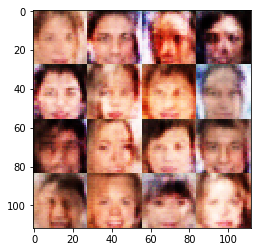

Epoch 0/1... Discriminator Loss: 1.0843... Generator Loss: 0.7678
Epoch 0/1... Discriminator Loss: 1.3648... Generator Loss: 0.6613
Epoch 0/1... Discriminator Loss: 1.1225... Generator Loss: 1.0914
Epoch 0/1... Discriminator Loss: 0.9887... Generator Loss: 0.8550
Epoch 0/1... Discriminator Loss: 1.3149... Generator Loss: 0.5353


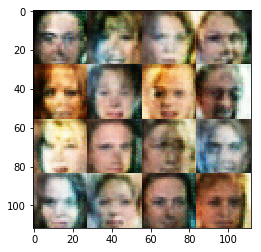

Epoch 0/1... Discriminator Loss: 1.2290... Generator Loss: 0.6292
Epoch 0/1... Discriminator Loss: 1.1623... Generator Loss: 1.0951
Epoch 0/1... Discriminator Loss: 1.2284... Generator Loss: 0.7771
Epoch 0/1... Discriminator Loss: 1.1847... Generator Loss: 0.9566
Epoch 0/1... Discriminator Loss: 1.4455... Generator Loss: 0.4453


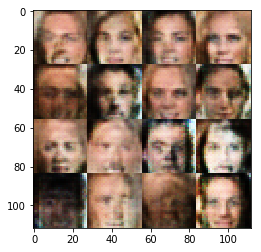

Epoch 0/1... Discriminator Loss: 0.9922... Generator Loss: 1.2141
Epoch 0/1... Discriminator Loss: 1.1624... Generator Loss: 0.7927
Epoch 0/1... Discriminator Loss: 1.2636... Generator Loss: 0.7021
Epoch 0/1... Discriminator Loss: 1.3164... Generator Loss: 0.6418
Epoch 0/1... Discriminator Loss: 1.2515... Generator Loss: 0.8952


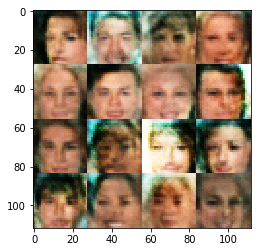

Epoch 0/1... Discriminator Loss: 1.1683... Generator Loss: 0.8239
Epoch 0/1... Discriminator Loss: 1.1889... Generator Loss: 0.8626
Epoch 0/1... Discriminator Loss: 1.0604... Generator Loss: 0.7541
Epoch 0/1... Discriminator Loss: 1.3246... Generator Loss: 0.6666
Epoch 0/1... Discriminator Loss: 1.4525... Generator Loss: 0.4682


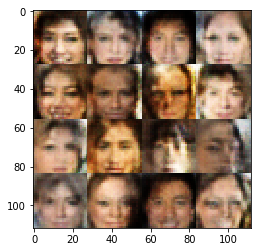

Epoch 0/1... Discriminator Loss: 1.2278... Generator Loss: 0.7901
Epoch 0/1... Discriminator Loss: 1.1412... Generator Loss: 0.7011
Epoch 0/1... Discriminator Loss: 1.0374... Generator Loss: 0.7629
Epoch 0/1... Discriminator Loss: 1.0925... Generator Loss: 0.7718
Epoch 0/1... Discriminator Loss: 1.2405... Generator Loss: 0.9802


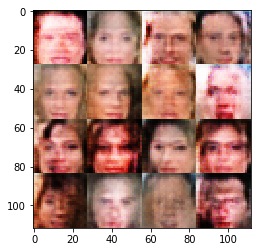

Epoch 0/1... Discriminator Loss: 1.1812... Generator Loss: 0.9193
Epoch 0/1... Discriminator Loss: 1.2312... Generator Loss: 0.8752
Epoch 0/1... Discriminator Loss: 1.1357... Generator Loss: 1.0401
Epoch 0/1... Discriminator Loss: 0.8175... Generator Loss: 0.9826
Epoch 0/1... Discriminator Loss: 1.1096... Generator Loss: 0.8848


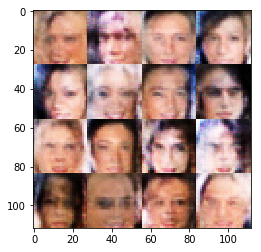

Epoch 0/1... Discriminator Loss: 1.3317... Generator Loss: 0.7610
Epoch 0/1... Discriminator Loss: 1.3206... Generator Loss: 0.7180
Epoch 0/1... Discriminator Loss: 1.0057... Generator Loss: 0.7862
Epoch 0/1... Discriminator Loss: 1.1175... Generator Loss: 0.7399
Epoch 0/1... Discriminator Loss: 1.5260... Generator Loss: 0.4258


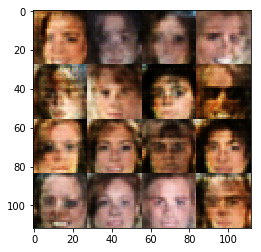

Epoch 0/1... Discriminator Loss: 0.9832... Generator Loss: 0.8332
Epoch 0/1... Discriminator Loss: 1.4052... Generator Loss: 0.4274
Epoch 0/1... Discriminator Loss: 1.1972... Generator Loss: 0.6754
Epoch 0/1... Discriminator Loss: 1.0250... Generator Loss: 0.8786
Epoch 0/1... Discriminator Loss: 1.2810... Generator Loss: 0.7430


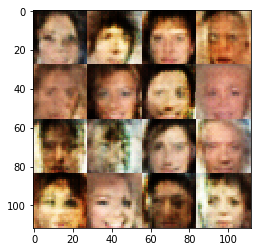

Epoch 0/1... Discriminator Loss: 1.4993... Generator Loss: 0.3601
Epoch 0/1... Discriminator Loss: 1.6219... Generator Loss: 0.3756
Epoch 0/1... Discriminator Loss: 1.0797... Generator Loss: 0.6524
Epoch 0/1... Discriminator Loss: 1.4114... Generator Loss: 0.4731
Epoch 0/1... Discriminator Loss: 1.4153... Generator Loss: 0.3958


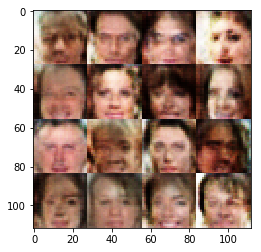

Epoch 0/1... Discriminator Loss: 1.2964... Generator Loss: 0.6515
Epoch 0/1... Discriminator Loss: 0.9070... Generator Loss: 1.0687
Epoch 0/1... Discriminator Loss: 1.6933... Generator Loss: 0.4644
Epoch 0/1... Discriminator Loss: 1.3075... Generator Loss: 0.5322
Epoch 0/1... Discriminator Loss: 1.2756... Generator Loss: 0.6003


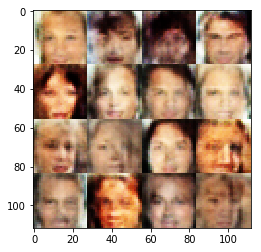

Epoch 0/1... Discriminator Loss: 1.3561... Generator Loss: 0.6391
Epoch 0/1... Discriminator Loss: 1.4678... Generator Loss: 0.8140
Epoch 0/1... Discriminator Loss: 1.3012... Generator Loss: 0.5951
Epoch 0/1... Discriminator Loss: 1.2962... Generator Loss: 0.5634
Epoch 0/1... Discriminator Loss: 1.1458... Generator Loss: 0.6559


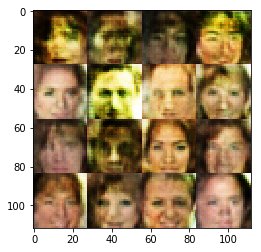

Epoch 0/1... Discriminator Loss: 1.2938... Generator Loss: 0.5374
Epoch 0/1... Discriminator Loss: 1.2446... Generator Loss: 0.7608
Epoch 0/1... Discriminator Loss: 1.3336... Generator Loss: 0.8435
Epoch 0/1... Discriminator Loss: 1.1765... Generator Loss: 0.5601
Epoch 0/1... Discriminator Loss: 1.4283... Generator Loss: 0.7805


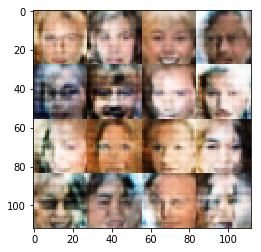

Epoch 0/1... Discriminator Loss: 1.4771... Generator Loss: 0.4427
Epoch 0/1... Discriminator Loss: 1.2190... Generator Loss: 0.7872
Epoch 0/1... Discriminator Loss: 1.0809... Generator Loss: 0.7666
Epoch 0/1... Discriminator Loss: 1.2159... Generator Loss: 0.6848
Epoch 0/1... Discriminator Loss: 1.2264... Generator Loss: 0.6833


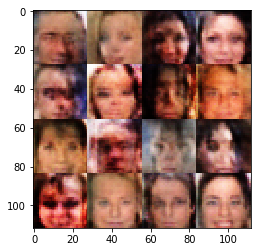

Epoch 0/1... Discriminator Loss: 1.1735... Generator Loss: 0.7401
Epoch 0/1... Discriminator Loss: 1.3620... Generator Loss: 0.4292
Epoch 0/1... Discriminator Loss: 1.2646... Generator Loss: 0.5898
Epoch 0/1... Discriminator Loss: 1.5929... Generator Loss: 0.3651
Epoch 0/1... Discriminator Loss: 1.1107... Generator Loss: 0.9187


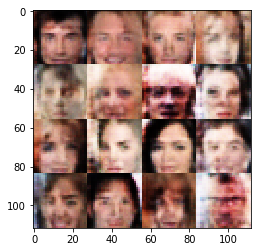

Epoch 0/1... Discriminator Loss: 1.1695... Generator Loss: 0.7039
Epoch 0/1... Discriminator Loss: 1.3742... Generator Loss: 0.7185
Epoch 0/1... Discriminator Loss: 1.1587... Generator Loss: 0.7123
Epoch 0/1... Discriminator Loss: 1.3802... Generator Loss: 0.4605
Epoch 0/1... Discriminator Loss: 1.0806... Generator Loss: 0.8029


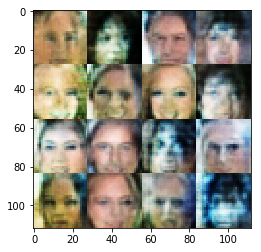

Epoch 0/1... Discriminator Loss: 1.4385... Generator Loss: 0.5399
Epoch 0/1... Discriminator Loss: 1.1282... Generator Loss: 0.8332
Epoch 0/1... Discriminator Loss: 1.4750... Generator Loss: 0.4950
Epoch 0/1... Discriminator Loss: 1.2280... Generator Loss: 0.6456
Epoch 0/1... Discriminator Loss: 1.1737... Generator Loss: 0.6099


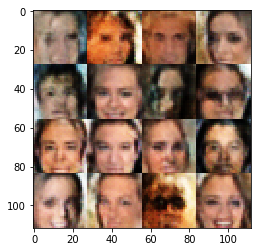

Epoch 0/1... Discriminator Loss: 1.3376... Generator Loss: 0.5403
Epoch 0/1... Discriminator Loss: 1.0171... Generator Loss: 0.8798
Epoch 0/1... Discriminator Loss: 1.3340... Generator Loss: 0.5715
Epoch 0/1... Discriminator Loss: 0.9905... Generator Loss: 0.8786
Epoch 0/1... Discriminator Loss: 1.2931... Generator Loss: 0.6371


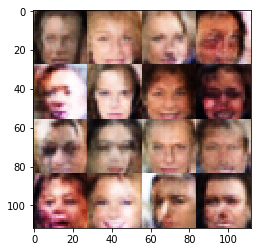

Epoch 0/1... Discriminator Loss: 0.9912... Generator Loss: 0.8671
Epoch 0/1... Discriminator Loss: 1.3848... Generator Loss: 0.4674
Epoch 0/1... Discriminator Loss: 1.0065... Generator Loss: 0.9231
Epoch 0/1... Discriminator Loss: 1.1541... Generator Loss: 0.7747
Epoch 0/1... Discriminator Loss: 1.1515... Generator Loss: 0.7190


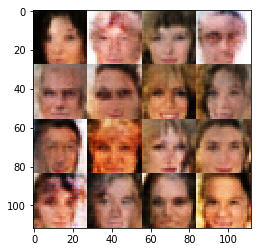

Epoch 0/1... Discriminator Loss: 1.0869... Generator Loss: 1.2647
Epoch 0/1... Discriminator Loss: 1.3889... Generator Loss: 0.6386
Epoch 0/1... Discriminator Loss: 0.9107... Generator Loss: 1.0766
Epoch 0/1... Discriminator Loss: 1.0705... Generator Loss: 0.8251
Epoch 0/1... Discriminator Loss: 1.0758... Generator Loss: 0.7209


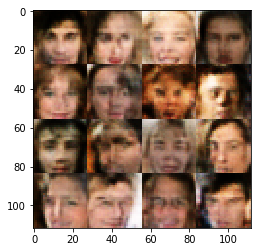

Epoch 0/1... Discriminator Loss: 1.0631... Generator Loss: 0.6505
Epoch 0/1... Discriminator Loss: 1.3037... Generator Loss: 0.5168
Epoch 0/1... Discriminator Loss: 1.0947... Generator Loss: 0.7745
Epoch 0/1... Discriminator Loss: 1.1459... Generator Loss: 0.8230
Epoch 0/1... Discriminator Loss: 1.4077... Generator Loss: 0.4232


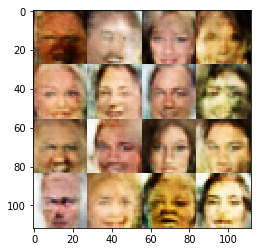

Epoch 0/1... Discriminator Loss: 1.2654... Generator Loss: 0.8716
Epoch 0/1... Discriminator Loss: 1.2859... Generator Loss: 0.8134
Epoch 0/1... Discriminator Loss: 1.4238... Generator Loss: 0.5497
Epoch 0/1... Discriminator Loss: 1.2895... Generator Loss: 0.6650
Epoch 0/1... Discriminator Loss: 1.3099... Generator Loss: 0.4839


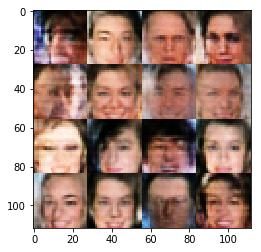

Epoch 0/1... Discriminator Loss: 0.9661... Generator Loss: 1.3013
Epoch 0/1... Discriminator Loss: 1.1732... Generator Loss: 0.7704
Epoch 0/1... Discriminator Loss: 0.8920... Generator Loss: 0.8014
Epoch 0/1... Discriminator Loss: 1.2143... Generator Loss: 0.6745
Epoch 0/1... Discriminator Loss: 1.2170... Generator Loss: 0.5538


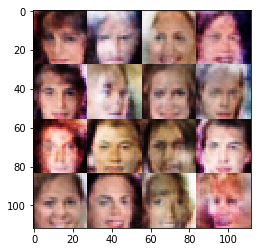

Epoch 0/1... Discriminator Loss: 1.3901... Generator Loss: 0.5827
Epoch 0/1... Discriminator Loss: 1.2048... Generator Loss: 0.8608
Epoch 0/1... Discriminator Loss: 1.1926... Generator Loss: 0.6329
Epoch 0/1... Discriminator Loss: 1.1382... Generator Loss: 0.6018
Epoch 0/1... Discriminator Loss: 0.8860... Generator Loss: 1.3275


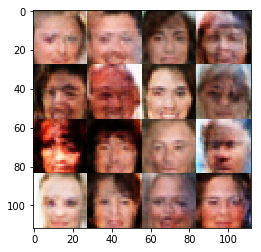

Epoch 0/1... Discriminator Loss: 1.1920... Generator Loss: 0.6680
Epoch 0/1... Discriminator Loss: 1.2908... Generator Loss: 0.5919
Epoch 0/1... Discriminator Loss: 1.1783... Generator Loss: 0.7584
Epoch 0/1... Discriminator Loss: 0.9894... Generator Loss: 0.8524
Epoch 0/1... Discriminator Loss: 1.4674... Generator Loss: 0.5797


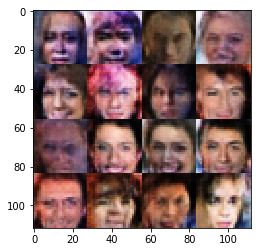

Epoch 0/1... Discriminator Loss: 1.3549... Generator Loss: 0.5889
Epoch 0/1... Discriminator Loss: 0.8738... Generator Loss: 1.0645
Epoch 0/1... Discriminator Loss: 1.0984... Generator Loss: 0.8558
Epoch 0/1... Discriminator Loss: 1.2651... Generator Loss: 0.6400
Epoch 0/1... Discriminator Loss: 1.2521... Generator Loss: 0.8880


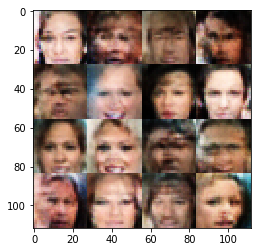

Epoch 0/1... Discriminator Loss: 1.5076... Generator Loss: 0.6014
Epoch 0/1... Discriminator Loss: 1.4266... Generator Loss: 0.4205
Epoch 0/1... Discriminator Loss: 1.0211... Generator Loss: 0.8024
Epoch 0/1... Discriminator Loss: 1.3029... Generator Loss: 0.5953
Epoch 0/1... Discriminator Loss: 0.9344... Generator Loss: 0.8272


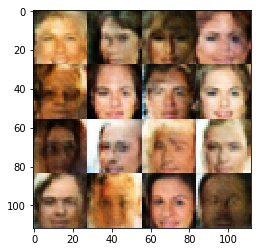

Epoch 0/1... Discriminator Loss: 1.3931... Generator Loss: 0.7491
Epoch 0/1... Discriminator Loss: 1.1605... Generator Loss: 0.5872
Epoch 0/1... Discriminator Loss: 1.6911... Generator Loss: 0.4925
Epoch 0/1... Discriminator Loss: 1.2636... Generator Loss: 0.5019
Epoch 0/1... Discriminator Loss: 1.2769... Generator Loss: 0.5140


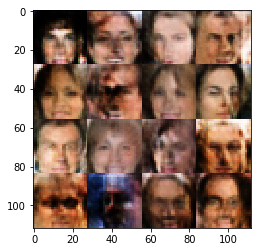

Epoch 0/1... Discriminator Loss: 1.1715... Generator Loss: 0.6912
Epoch 0/1... Discriminator Loss: 1.0683... Generator Loss: 0.7683
Epoch 0/1... Discriminator Loss: 1.5947... Generator Loss: 0.5070
Epoch 0/1... Discriminator Loss: 1.2345... Generator Loss: 0.7468
Epoch 0/1... Discriminator Loss: 0.8511... Generator Loss: 1.0560


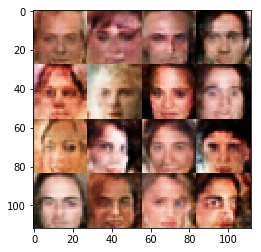

Epoch 0/1... Discriminator Loss: 0.7066... Generator Loss: 1.1238
Epoch 0/1... Discriminator Loss: 1.1666... Generator Loss: 0.7955
Epoch 0/1... Discriminator Loss: 1.1589... Generator Loss: 0.6622
Epoch 0/1... Discriminator Loss: 1.0608... Generator Loss: 0.9842
Epoch 0/1... Discriminator Loss: 1.4001... Generator Loss: 0.4297


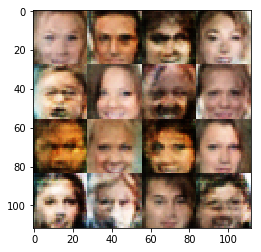

Epoch 0/1... Discriminator Loss: 1.0909... Generator Loss: 0.7287
Epoch 0/1... Discriminator Loss: 1.1191... Generator Loss: 0.8821
Epoch 0/1... Discriminator Loss: 1.0337... Generator Loss: 0.9031
Epoch 0/1... Discriminator Loss: 0.9989... Generator Loss: 0.9533
Epoch 0/1... Discriminator Loss: 1.6428... Generator Loss: 0.3175


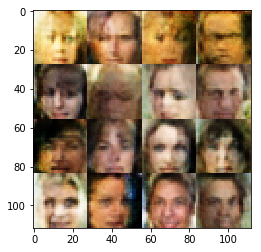

Epoch 0/1... Discriminator Loss: 1.2873... Generator Loss: 0.4953
Epoch 0/1... Discriminator Loss: 0.9106... Generator Loss: 1.0713
Epoch 0/1... Discriminator Loss: 0.9553... Generator Loss: 1.0440
Epoch 0/1... Discriminator Loss: 1.1215... Generator Loss: 0.6244
Epoch 0/1... Discriminator Loss: 1.4225... Generator Loss: 0.4143


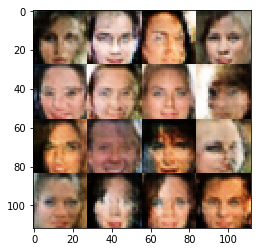

Epoch 0/1... Discriminator Loss: 1.2053... Generator Loss: 0.5976
Epoch 0/1... Discriminator Loss: 1.2431... Generator Loss: 0.5125
Epoch 0/1... Discriminator Loss: 1.2214... Generator Loss: 0.7305
Epoch 0/1... Discriminator Loss: 1.0603... Generator Loss: 0.7464
Epoch 0/1... Discriminator Loss: 1.1215... Generator Loss: 0.7886


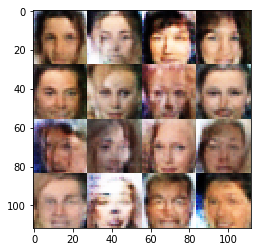

Epoch 0/1... Discriminator Loss: 1.1848... Generator Loss: 0.7270
Epoch 0/1... Discriminator Loss: 1.3536... Generator Loss: 0.7385
Epoch 0/1... Discriminator Loss: 1.1060... Generator Loss: 0.7940
Epoch 0/1... Discriminator Loss: 1.0477... Generator Loss: 0.7173
Epoch 0/1... Discriminator Loss: 0.7073... Generator Loss: 1.0849


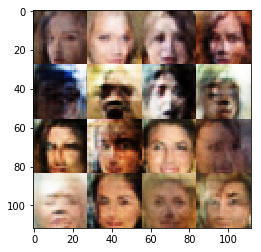

Epoch 0/1... Discriminator Loss: 1.1222... Generator Loss: 1.0626
Epoch 0/1... Discriminator Loss: 0.8366... Generator Loss: 1.2692
Epoch 0/1... Discriminator Loss: 1.3753... Generator Loss: 0.4665
Epoch 0/1... Discriminator Loss: 1.2635... Generator Loss: 0.7028
Epoch 0/1... Discriminator Loss: 1.2344... Generator Loss: 0.5403


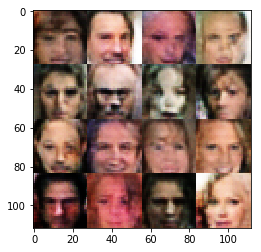

Epoch 0/1... Discriminator Loss: 0.9557... Generator Loss: 0.8986
Epoch 0/1... Discriminator Loss: 1.2867... Generator Loss: 0.4908
Epoch 0/1... Discriminator Loss: 0.9517... Generator Loss: 0.9068
Epoch 0/1... Discriminator Loss: 1.6769... Generator Loss: 0.4801
Epoch 0/1... Discriminator Loss: 1.0321... Generator Loss: 0.7825


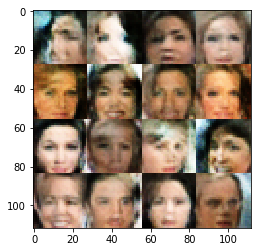

Epoch 0/1... Discriminator Loss: 1.3400... Generator Loss: 0.5104
Epoch 0/1... Discriminator Loss: 1.2932... Generator Loss: 0.5932
Epoch 0/1... Discriminator Loss: 1.0472... Generator Loss: 0.7179
Epoch 0/1... Discriminator Loss: 1.3863... Generator Loss: 0.4439
Epoch 0/1... Discriminator Loss: 1.0221... Generator Loss: 0.8560


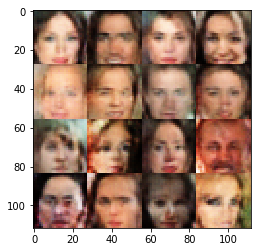

Epoch 0/1... Discriminator Loss: 1.3550... Generator Loss: 0.5248
Epoch 0/1... Discriminator Loss: 0.8930... Generator Loss: 1.1442
Epoch 0/1... Discriminator Loss: 1.2887... Generator Loss: 0.7476
Epoch 0/1... Discriminator Loss: 0.8754... Generator Loss: 0.8672
Epoch 0/1... Discriminator Loss: 1.2411... Generator Loss: 0.5758


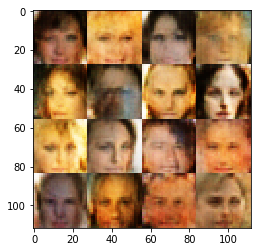

Epoch 0/1... Discriminator Loss: 1.4720... Generator Loss: 0.4658
Epoch 0/1... Discriminator Loss: 1.4327... Generator Loss: 0.4295
Epoch 0/1... Discriminator Loss: 1.2243... Generator Loss: 0.6352
Epoch 0/1... Discriminator Loss: 1.0679... Generator Loss: 0.7957
Epoch 0/1... Discriminator Loss: 1.4065... Generator Loss: 0.6914


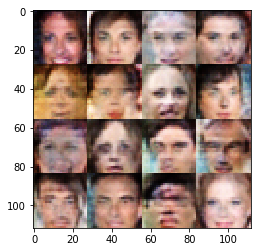

Epoch 0/1... Discriminator Loss: 1.4695... Generator Loss: 0.3608
Epoch 0/1... Discriminator Loss: 1.2528... Generator Loss: 0.5204
Epoch 0/1... Discriminator Loss: 1.1692... Generator Loss: 0.7470
Epoch 0/1... Discriminator Loss: 1.4343... Generator Loss: 0.3812
Epoch 0/1... Discriminator Loss: 1.5413... Generator Loss: 0.4424


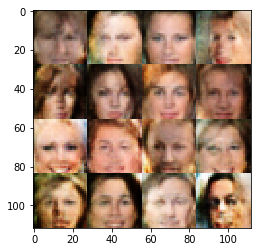

Epoch 0/1... Discriminator Loss: 1.2633... Generator Loss: 0.6151
Epoch 0/1... Discriminator Loss: 1.4664... Generator Loss: 0.4862
Epoch 0/1... Discriminator Loss: 1.2496... Generator Loss: 0.5531
Epoch 0/1... Discriminator Loss: 1.2360... Generator Loss: 0.5514
Epoch 0/1... Discriminator Loss: 1.9427... Generator Loss: 0.2096


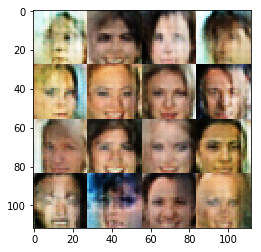

Epoch 0/1... Discriminator Loss: 1.7975... Generator Loss: 0.4729
Epoch 0/1... Discriminator Loss: 1.4971... Generator Loss: 0.3913
Epoch 0/1... Discriminator Loss: 1.1306... Generator Loss: 0.6281
Epoch 0/1... Discriminator Loss: 1.2028... Generator Loss: 0.7907
Epoch 0/1... Discriminator Loss: 1.0728... Generator Loss: 0.8350


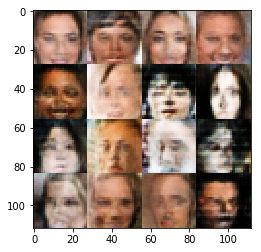

Epoch 0/1... Discriminator Loss: 1.0493... Generator Loss: 0.8920
Epoch 0/1... Discriminator Loss: 1.2075... Generator Loss: 0.7455
Epoch 0/1... Discriminator Loss: 1.1642... Generator Loss: 0.7120
Epoch 0/1... Discriminator Loss: 1.3447... Generator Loss: 0.6707
Epoch 0/1... Discriminator Loss: 0.9895... Generator Loss: 0.6818


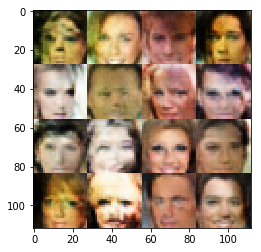

Epoch 0/1... Discriminator Loss: 1.5107... Generator Loss: 0.4035
Epoch 0/1... Discriminator Loss: 1.2138... Generator Loss: 0.5914
Epoch 0/1... Discriminator Loss: 0.8192... Generator Loss: 1.3396
Epoch 0/1... Discriminator Loss: 1.0994... Generator Loss: 0.6192
Epoch 0/1... Discriminator Loss: 1.3274... Generator Loss: 0.7157


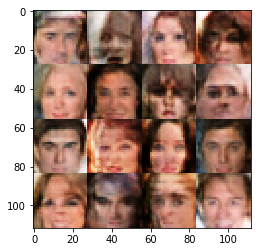

Epoch 0/1... Discriminator Loss: 1.2943... Generator Loss: 0.4640
Epoch 0/1... Discriminator Loss: 1.0081... Generator Loss: 0.7388
Epoch 0/1... Discriminator Loss: 1.3904... Generator Loss: 0.4055
Epoch 0/1... Discriminator Loss: 1.0923... Generator Loss: 0.8536
Epoch 0/1... Discriminator Loss: 0.6611... Generator Loss: 1.3976


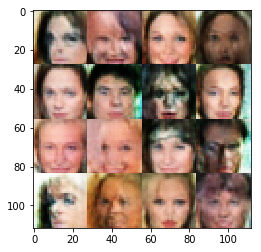

Epoch 0/1... Discriminator Loss: 1.1357... Generator Loss: 0.6252
Epoch 0/1... Discriminator Loss: 1.0070... Generator Loss: 1.0934
Epoch 0/1... Discriminator Loss: 1.2108... Generator Loss: 0.6704
Epoch 0/1... Discriminator Loss: 1.0790... Generator Loss: 0.7426
Epoch 0/1... Discriminator Loss: 0.9534... Generator Loss: 0.9963


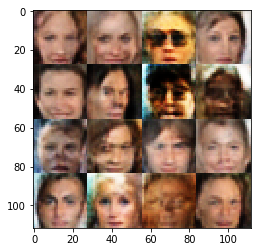

Epoch 0/1... Discriminator Loss: 1.1597... Generator Loss: 0.6919
Epoch 0/1... Discriminator Loss: 1.0101... Generator Loss: 1.3764
Epoch 0/1... Discriminator Loss: 1.3833... Generator Loss: 0.4392
Epoch 0/1... Discriminator Loss: 1.3709... Generator Loss: 0.4950
Epoch 0/1... Discriminator Loss: 1.3660... Generator Loss: 0.4503


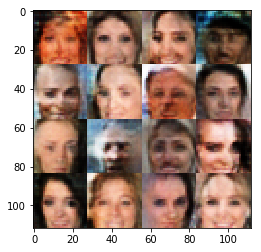

Epoch 0/1... Discriminator Loss: 1.1694... Generator Loss: 0.6708
Epoch 0/1... Discriminator Loss: 1.5042... Generator Loss: 0.4812
Epoch 0/1... Discriminator Loss: 1.1125... Generator Loss: 0.7588
Epoch 0/1... Discriminator Loss: 1.2752... Generator Loss: 0.5028
Epoch 0/1... Discriminator Loss: 1.0200... Generator Loss: 0.7570


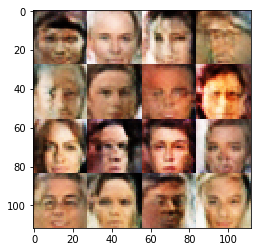

Epoch 0/1... Discriminator Loss: 0.9712... Generator Loss: 0.6908
Epoch 0/1... Discriminator Loss: 1.4613... Generator Loss: 0.4670
Epoch 0/1... Discriminator Loss: 1.3081... Generator Loss: 0.4886
Epoch 0/1... Discriminator Loss: 1.0933... Generator Loss: 0.9661
Epoch 0/1... Discriminator Loss: 1.1867... Generator Loss: 1.0280


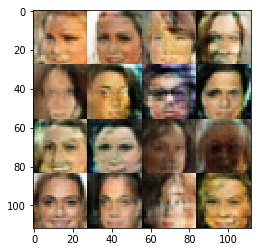

Epoch 0/1... Discriminator Loss: 0.8970... Generator Loss: 1.0505
Epoch 0/1... Discriminator Loss: 1.6766... Generator Loss: 0.2892
Epoch 0/1... Discriminator Loss: 1.4591... Generator Loss: 0.4303
Epoch 0/1... Discriminator Loss: 1.3623... Generator Loss: 0.5683
Epoch 0/1... Discriminator Loss: 1.4612... Generator Loss: 0.3582


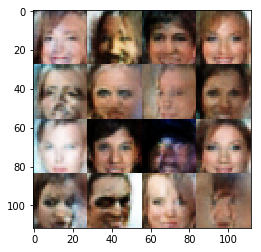

Epoch 0/1... Discriminator Loss: 1.6257... Generator Loss: 0.4471
Epoch 0/1... Discriminator Loss: 1.2840... Generator Loss: 0.5245
Epoch 0/1... Discriminator Loss: 1.1379... Generator Loss: 0.6534
Epoch 0/1... Discriminator Loss: 0.9233... Generator Loss: 0.8308
Epoch 0/1... Discriminator Loss: 1.2517... Generator Loss: 0.6174


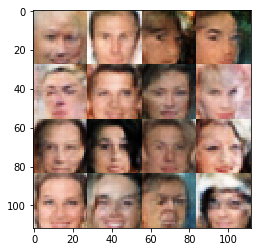

Epoch 0/1... Discriminator Loss: 1.6117... Generator Loss: 0.4283
Epoch 0/1... Discriminator Loss: 1.6108... Generator Loss: 0.2880
Epoch 0/1... Discriminator Loss: 1.0742... Generator Loss: 0.6666
Epoch 0/1... Discriminator Loss: 0.9374... Generator Loss: 0.9698
Epoch 0/1... Discriminator Loss: 1.4008... Generator Loss: 0.6226


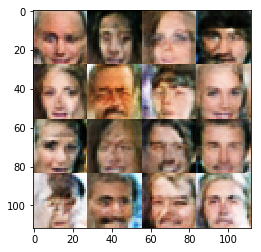

Epoch 0/1... Discriminator Loss: 1.2272... Generator Loss: 0.8049
Epoch 0/1... Discriminator Loss: 1.1734... Generator Loss: 0.6098
Epoch 0/1... Discriminator Loss: 1.4363... Generator Loss: 0.4076
Epoch 0/1... Discriminator Loss: 0.6403... Generator Loss: 1.2628
Epoch 0/1... Discriminator Loss: 1.0882... Generator Loss: 0.7351


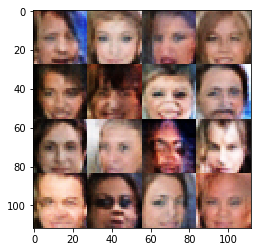

Epoch 0/1... Discriminator Loss: 0.9646... Generator Loss: 0.8929
Epoch 0/1... Discriminator Loss: 1.2407... Generator Loss: 0.6008
Epoch 0/1... Discriminator Loss: 0.9789... Generator Loss: 1.0539
Epoch 0/1... Discriminator Loss: 0.9502... Generator Loss: 0.9690
Epoch 0/1... Discriminator Loss: 1.4394... Generator Loss: 0.4630


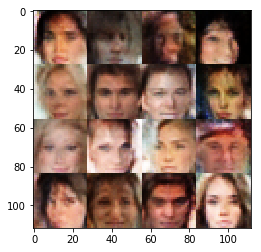

Epoch 0/1... Discriminator Loss: 1.5808... Generator Loss: 0.3925
Epoch 0/1... Discriminator Loss: 1.2335... Generator Loss: 0.6343
Epoch 0/1... Discriminator Loss: 1.1453... Generator Loss: 0.7510
Epoch 0/1... Discriminator Loss: 1.3250... Generator Loss: 0.5759
Epoch 0/1... Discriminator Loss: 0.9848... Generator Loss: 0.8059


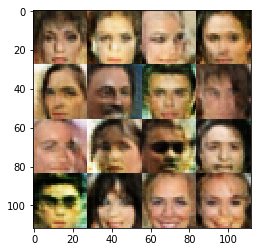

Epoch 0/1... Discriminator Loss: 0.9281... Generator Loss: 1.0240
Epoch 0/1... Discriminator Loss: 1.2733... Generator Loss: 0.5415
Epoch 0/1... Discriminator Loss: 1.3385... Generator Loss: 0.5739
Epoch 0/1... Discriminator Loss: 1.4468... Generator Loss: 0.4612
Epoch 0/1... Discriminator Loss: 1.4785... Generator Loss: 0.4206


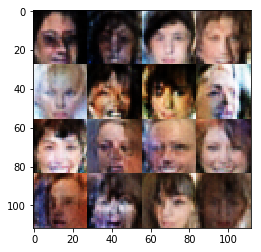

Epoch 0/1... Discriminator Loss: 1.2774... Generator Loss: 0.8055
Epoch 0/1... Discriminator Loss: 1.0256... Generator Loss: 0.8083
Epoch 0/1... Discriminator Loss: 1.2338... Generator Loss: 0.6554
Epoch 0/1... Discriminator Loss: 1.1501... Generator Loss: 0.5970
Epoch 0/1... Discriminator Loss: 1.0639... Generator Loss: 0.9017


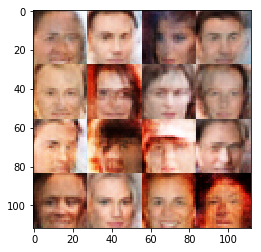

Epoch 0/1... Discriminator Loss: 1.1155... Generator Loss: 0.6073
Epoch 0/1... Discriminator Loss: 1.0108... Generator Loss: 0.8074
Epoch 0/1... Discriminator Loss: 1.3107... Generator Loss: 0.5150
Epoch 0/1... Discriminator Loss: 1.2178... Generator Loss: 0.8452
Epoch 0/1... Discriminator Loss: 1.1755... Generator Loss: 0.8555


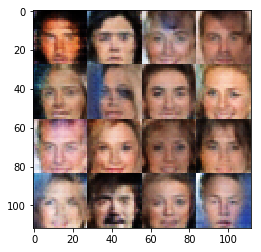

Epoch 0/1... Discriminator Loss: 1.9336... Generator Loss: 0.2313
Epoch 0/1... Discriminator Loss: 1.2256... Generator Loss: 0.5379
Epoch 0/1... Discriminator Loss: 1.0798... Generator Loss: 0.7443
Epoch 0/1... Discriminator Loss: 1.0803... Generator Loss: 0.6689
Epoch 0/1... Discriminator Loss: 0.9855... Generator Loss: 0.8311


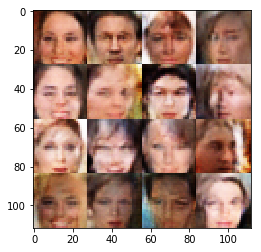

Epoch 0/1... Discriminator Loss: 1.1989... Generator Loss: 0.5983
Epoch 0/1... Discriminator Loss: 1.2922... Generator Loss: 0.6045
Epoch 0/1... Discriminator Loss: 1.1713... Generator Loss: 0.6118
Epoch 0/1... Discriminator Loss: 1.2835... Generator Loss: 0.5618
Epoch 0/1... Discriminator Loss: 1.4321... Generator Loss: 0.4706


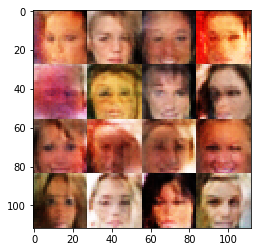

Epoch 0/1... Discriminator Loss: 1.0233... Generator Loss: 0.7486
Epoch 0/1... Discriminator Loss: 1.4182... Generator Loss: 0.4241
Epoch 0/1... Discriminator Loss: 1.5942... Generator Loss: 0.4237
Epoch 0/1... Discriminator Loss: 0.6460... Generator Loss: 1.4290
Epoch 0/1... Discriminator Loss: 1.2391... Generator Loss: 0.6415


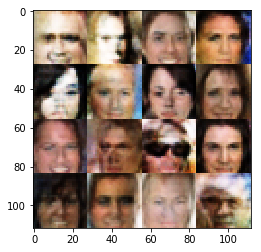

Epoch 0/1... Discriminator Loss: 1.6608... Generator Loss: 0.2972
Epoch 0/1... Discriminator Loss: 1.6223... Generator Loss: 0.3897
Epoch 0/1... Discriminator Loss: 1.4409... Generator Loss: 0.4370
Epoch 0/1... Discriminator Loss: 0.9597... Generator Loss: 0.7371
Epoch 0/1... Discriminator Loss: 1.0471... Generator Loss: 0.9381


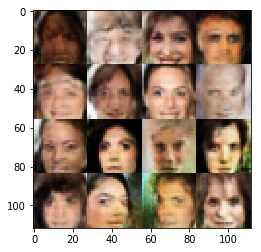

Epoch 0/1... Discriminator Loss: 1.3892... Generator Loss: 0.4127
Epoch 0/1... Discriminator Loss: 1.0674... Generator Loss: 0.7529
Epoch 0/1... Discriminator Loss: 1.5439... Generator Loss: 0.4755
Epoch 0/1... Discriminator Loss: 1.8660... Generator Loss: 0.3176
Epoch 0/1... Discriminator Loss: 1.4373... Generator Loss: 0.4931


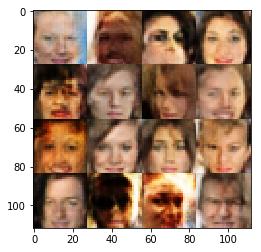

Epoch 0/1... Discriminator Loss: 1.2719... Generator Loss: 0.5544
Epoch 0/1... Discriminator Loss: 1.3260... Generator Loss: 0.4485
Epoch 0/1... Discriminator Loss: 1.2774... Generator Loss: 0.5018
Epoch 0/1... Discriminator Loss: 1.3598... Generator Loss: 0.6942
Epoch 0/1... Discriminator Loss: 1.1347... Generator Loss: 0.5795


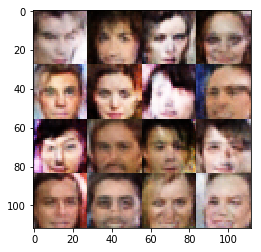

Epoch 0/1... Discriminator Loss: 1.3207... Generator Loss: 0.4956
Epoch 0/1... Discriminator Loss: 1.2831... Generator Loss: 0.8192
Epoch 0/1... Discriminator Loss: 1.1180... Generator Loss: 0.7314
Epoch 0/1... Discriminator Loss: 1.7068... Generator Loss: 0.2712
Epoch 0/1... Discriminator Loss: 0.9872... Generator Loss: 0.8433


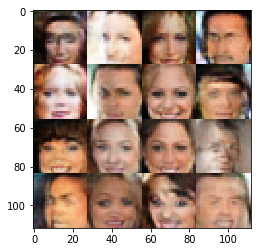

Epoch 0/1... Discriminator Loss: 1.0642... Generator Loss: 0.8586
Epoch 0/1... Discriminator Loss: 1.5016... Generator Loss: 0.5774
Epoch 0/1... Discriminator Loss: 1.4864... Generator Loss: 0.5277
Epoch 0/1... Discriminator Loss: 0.9334... Generator Loss: 0.9873
Epoch 0/1... Discriminator Loss: 1.4739... Generator Loss: 0.4074


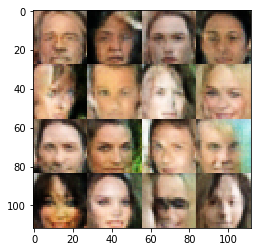

Epoch 0/1... Discriminator Loss: 1.3176... Generator Loss: 0.5802
Epoch 0/1... Discriminator Loss: 1.5745... Generator Loss: 0.3677
Epoch 0/1... Discriminator Loss: 1.3959... Generator Loss: 0.5039
Epoch 0/1... Discriminator Loss: 1.4935... Generator Loss: 0.3852
Epoch 0/1... Discriminator Loss: 0.7021... Generator Loss: 1.3529


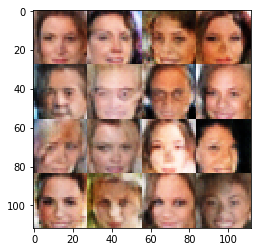

Epoch 0/1... Discriminator Loss: 1.3651... Generator Loss: 0.5333
Epoch 0/1... Discriminator Loss: 1.3265... Generator Loss: 0.6208
Epoch 0/1... Discriminator Loss: 1.2755... Generator Loss: 0.6626
Epoch 0/1... Discriminator Loss: 1.4024... Generator Loss: 0.4901
Epoch 0/1... Discriminator Loss: 1.1873... Generator Loss: 0.6969


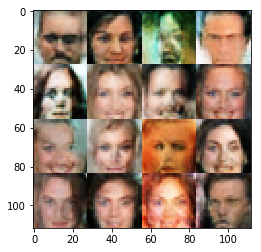

Epoch 0/1... Discriminator Loss: 1.5162... Generator Loss: 0.4059
Epoch 0/1... Discriminator Loss: 1.3918... Generator Loss: 0.5240
Epoch 0/1... Discriminator Loss: 1.2440... Generator Loss: 0.9911
Epoch 0/1... Discriminator Loss: 1.3530... Generator Loss: 0.4943
Epoch 0/1... Discriminator Loss: 1.3344... Generator Loss: 0.5764


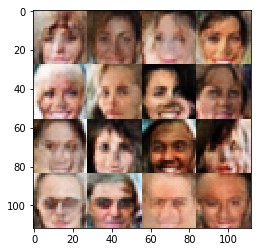

Epoch 0/1... Discriminator Loss: 1.3311... Generator Loss: 0.6583
Epoch 0/1... Discriminator Loss: 1.2847... Generator Loss: 0.5474
Epoch 0/1... Discriminator Loss: 1.1933... Generator Loss: 0.7858
Epoch 0/1... Discriminator Loss: 1.1042... Generator Loss: 0.8213
Epoch 0/1... Discriminator Loss: 1.0042... Generator Loss: 0.8730


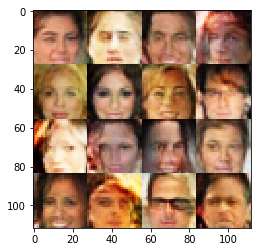

Epoch 0/1... Discriminator Loss: 0.9816... Generator Loss: 0.7431
Epoch 0/1... Discriminator Loss: 1.1515... Generator Loss: 0.6535
Epoch 0/1... Discriminator Loss: 1.0925... Generator Loss: 0.6625
Epoch 0/1... Discriminator Loss: 1.5594... Generator Loss: 0.4264
Epoch 0/1... Discriminator Loss: 1.2249... Generator Loss: 0.4863


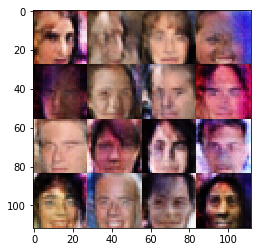

Epoch 0/1... Discriminator Loss: 1.1787... Generator Loss: 0.5894
Epoch 0/1... Discriminator Loss: 0.7345... Generator Loss: 1.3428
Epoch 0/1... Discriminator Loss: 1.4123... Generator Loss: 0.4799
Epoch 0/1... Discriminator Loss: 1.3226... Generator Loss: 0.5360
Epoch 0/1... Discriminator Loss: 1.2496... Generator Loss: 0.5662


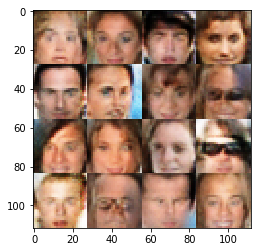

Epoch 0/1... Discriminator Loss: 1.2226... Generator Loss: 0.7433
Epoch 0/1... Discriminator Loss: 1.4385... Generator Loss: 0.4083
Epoch 0/1... Discriminator Loss: 1.1951... Generator Loss: 0.7827
Epoch 0/1... Discriminator Loss: 1.4965... Generator Loss: 0.4492
Epoch 0/1... Discriminator Loss: 1.3828... Generator Loss: 0.5189


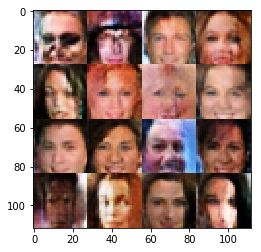

Epoch 0/1... Discriminator Loss: 1.0646... Generator Loss: 0.6025
Epoch 0/1... Discriminator Loss: 1.1832... Generator Loss: 0.5758
Epoch 0/1... Discriminator Loss: 1.4165... Generator Loss: 0.5101
Epoch 0/1... Discriminator Loss: 1.1364... Generator Loss: 0.9081
Epoch 0/1... Discriminator Loss: 1.0773... Generator Loss: 0.6988


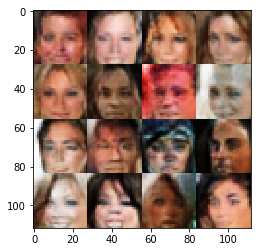

Epoch 0/1... Discriminator Loss: 1.4411... Generator Loss: 0.8623
Epoch 0/1... Discriminator Loss: 1.3364... Generator Loss: 0.4522
Epoch 0/1... Discriminator Loss: 1.2168... Generator Loss: 0.7308
Epoch 0/1... Discriminator Loss: 1.3161... Generator Loss: 0.6960
Epoch 0/1... Discriminator Loss: 1.2730... Generator Loss: 0.4612


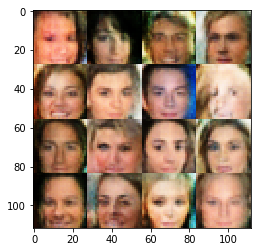

Epoch 0/1... Discriminator Loss: 1.1483... Generator Loss: 0.9352
Epoch 0/1... Discriminator Loss: 1.6918... Generator Loss: 0.4568
Epoch 0/1... Discriminator Loss: 1.2160... Generator Loss: 0.7207
Epoch 0/1... Discriminator Loss: 1.2409... Generator Loss: 0.6119
Epoch 0/1... Discriminator Loss: 1.2969... Generator Loss: 0.8274


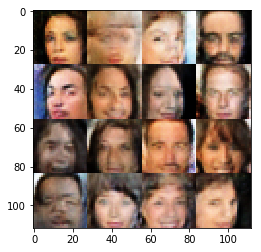

Epoch 0/1... Discriminator Loss: 1.1900... Generator Loss: 0.9249
Epoch 0/1... Discriminator Loss: 1.2112... Generator Loss: 0.5743
Epoch 0/1... Discriminator Loss: 1.3559... Generator Loss: 0.4946
Epoch 0/1... Discriminator Loss: 1.4309... Generator Loss: 0.4073
Epoch 0/1... Discriminator Loss: 1.3771... Generator Loss: 0.5154


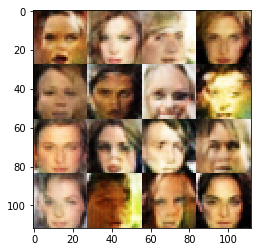

Epoch 0/1... Discriminator Loss: 1.2401... Generator Loss: 0.5849
Epoch 0/1... Discriminator Loss: 1.2182... Generator Loss: 0.6973
Epoch 0/1... Discriminator Loss: 1.0062... Generator Loss: 0.7061
Epoch 0/1... Discriminator Loss: 1.0970... Generator Loss: 0.6814
Epoch 0/1... Discriminator Loss: 1.5793... Generator Loss: 0.4039


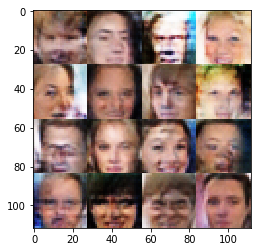

Epoch 0/1... Discriminator Loss: 1.3391... Generator Loss: 0.4968
Epoch 0/1... Discriminator Loss: 1.6155... Generator Loss: 0.3470
Epoch 0/1... Discriminator Loss: 1.2868... Generator Loss: 0.4171
Epoch 0/1... Discriminator Loss: 1.1388... Generator Loss: 0.6415
Epoch 0/1... Discriminator Loss: 1.1524... Generator Loss: 0.6724


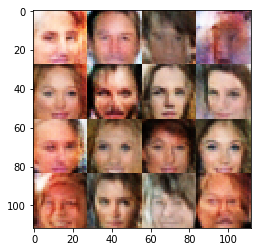

Epoch 0/1... Discriminator Loss: 1.1634... Generator Loss: 0.6413
Epoch 0/1... Discriminator Loss: 1.3856... Generator Loss: 0.5251
Epoch 0/1... Discriminator Loss: 1.3373... Generator Loss: 0.6008
Epoch 0/1... Discriminator Loss: 1.7894... Generator Loss: 0.4819
Epoch 0/1... Discriminator Loss: 1.1200... Generator Loss: 0.4860


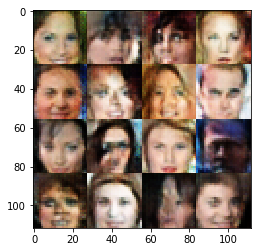

Epoch 0/1... Discriminator Loss: 1.0766... Generator Loss: 1.2086
Epoch 0/1... Discriminator Loss: 1.4216... Generator Loss: 0.5526
Epoch 0/1... Discriminator Loss: 1.0975... Generator Loss: 0.8637
Epoch 0/1... Discriminator Loss: 1.1960... Generator Loss: 0.7545
Epoch 0/1... Discriminator Loss: 0.8250... Generator Loss: 1.2107


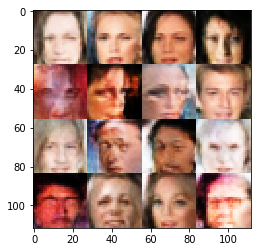

Epoch 0/1... Discriminator Loss: 1.1906... Generator Loss: 0.9176
Epoch 0/1... Discriminator Loss: 1.5607... Generator Loss: 0.4484
Epoch 0/1... Discriminator Loss: 1.2307... Generator Loss: 0.6101
Epoch 0/1... Discriminator Loss: 1.1551... Generator Loss: 0.5132
Epoch 0/1... Discriminator Loss: 1.2917... Generator Loss: 0.5010


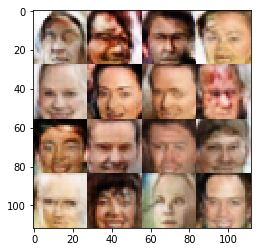

Epoch 0/1... Discriminator Loss: 1.0084... Generator Loss: 0.8143
Epoch 0/1... Discriminator Loss: 1.5688... Generator Loss: 0.3860
Epoch 0/1... Discriminator Loss: 1.4579... Generator Loss: 0.4651
Epoch 0/1... Discriminator Loss: 1.3540... Generator Loss: 0.6112
Epoch 0/1... Discriminator Loss: 0.9804... Generator Loss: 0.9157


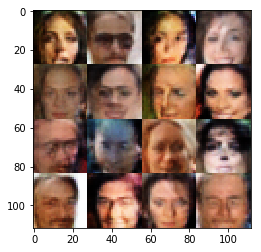

Epoch 0/1... Discriminator Loss: 1.0668... Generator Loss: 0.8567
Epoch 0/1... Discriminator Loss: 1.0491... Generator Loss: 0.8180
Epoch 0/1... Discriminator Loss: 1.7745... Generator Loss: 0.2846
Epoch 0/1... Discriminator Loss: 1.0779... Generator Loss: 0.8768
Epoch 0/1... Discriminator Loss: 1.1256... Generator Loss: 0.6038


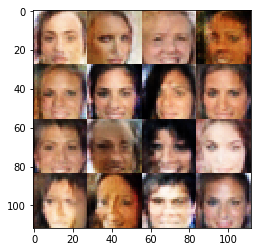

Epoch 0/1... Discriminator Loss: 1.1768... Generator Loss: 0.6067
Epoch 0/1... Discriminator Loss: 1.4748... Generator Loss: 0.5963
Epoch 0/1... Discriminator Loss: 1.0970... Generator Loss: 0.7127
Epoch 0/1... Discriminator Loss: 1.0270... Generator Loss: 0.9347
Epoch 0/1... Discriminator Loss: 1.2078... Generator Loss: 0.7400


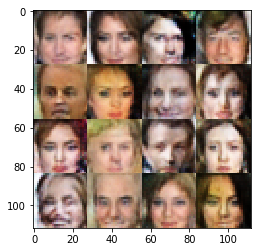

Epoch 0/1... Discriminator Loss: 1.4599... Generator Loss: 0.3492
Epoch 0/1... Discriminator Loss: 1.4254... Generator Loss: 0.8254
Epoch 0/1... Discriminator Loss: 1.2702... Generator Loss: 0.5101
Epoch 0/1... Discriminator Loss: 1.0865... Generator Loss: 0.7198
Epoch 0/1... Discriminator Loss: 1.2131... Generator Loss: 0.6441


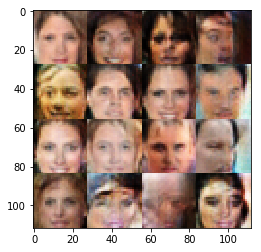

Epoch 0/1... Discriminator Loss: 0.9223... Generator Loss: 0.8407
Epoch 0/1... Discriminator Loss: 0.6886... Generator Loss: 1.0677
Epoch 0/1... Discriminator Loss: 1.1389... Generator Loss: 0.7522
Epoch 0/1... Discriminator Loss: 1.2790... Generator Loss: 1.1186
Epoch 0/1... Discriminator Loss: 1.1241... Generator Loss: 1.0638


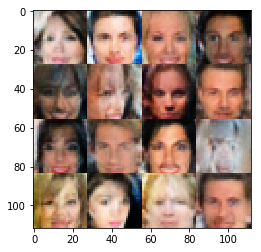

Epoch 0/1... Discriminator Loss: 1.5288... Generator Loss: 0.7562
Epoch 0/1... Discriminator Loss: 1.1880... Generator Loss: 0.5576
Epoch 0/1... Discriminator Loss: 0.9405... Generator Loss: 0.7969
Epoch 0/1... Discriminator Loss: 1.3410... Generator Loss: 0.5589
Epoch 0/1... Discriminator Loss: 1.3174... Generator Loss: 0.5777


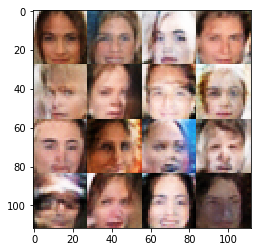

Epoch 0/1... Discriminator Loss: 1.2464... Generator Loss: 0.6078
Epoch 0/1... Discriminator Loss: 1.3412... Generator Loss: 0.4437
Epoch 0/1... Discriminator Loss: 1.3654... Generator Loss: 0.5287
Epoch 0/1... Discriminator Loss: 0.9841... Generator Loss: 0.9988
Epoch 0/1... Discriminator Loss: 1.2069... Generator Loss: 0.8337


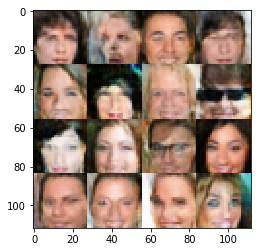

Epoch 0/1... Discriminator Loss: 1.3852... Generator Loss: 0.5060
Epoch 0/1... Discriminator Loss: 1.1743... Generator Loss: 0.6938
Epoch 0/1... Discriminator Loss: 1.3421... Generator Loss: 0.5781
Epoch 0/1... Discriminator Loss: 1.1754... Generator Loss: 0.5741
Epoch 0/1... Discriminator Loss: 1.0097... Generator Loss: 0.7239


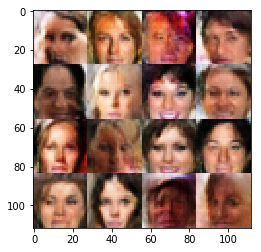

Epoch 0/1... Discriminator Loss: 1.1449... Generator Loss: 0.6004
Epoch 0/1... Discriminator Loss: 1.7226... Generator Loss: 0.6104
Epoch 0/1... Discriminator Loss: 1.3575... Generator Loss: 0.5004
Epoch 0/1... Discriminator Loss: 1.2112... Generator Loss: 0.5840
Epoch 0/1... Discriminator Loss: 1.4633... Generator Loss: 0.4296


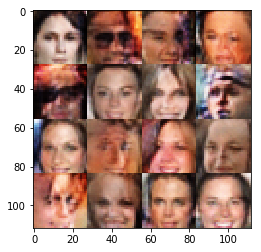

Epoch 0/1... Discriminator Loss: 1.5290... Generator Loss: 0.4815
Epoch 0/1... Discriminator Loss: 0.8708... Generator Loss: 0.9132
Epoch 0/1... Discriminator Loss: 1.2190... Generator Loss: 0.9952
Epoch 0/1... Discriminator Loss: 1.3736... Generator Loss: 0.6169
Epoch 0/1... Discriminator Loss: 0.9500... Generator Loss: 1.0398


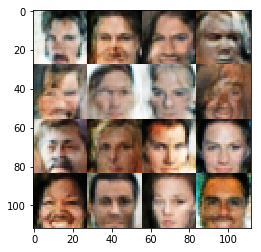

Epoch 0/1... Discriminator Loss: 1.3322... Generator Loss: 0.4129
Epoch 0/1... Discriminator Loss: 1.3326... Generator Loss: 0.6177
Epoch 0/1... Discriminator Loss: 1.2105... Generator Loss: 0.5421
Epoch 0/1... Discriminator Loss: 1.2609... Generator Loss: 0.6404
Epoch 0/1... Discriminator Loss: 0.9083... Generator Loss: 0.8604


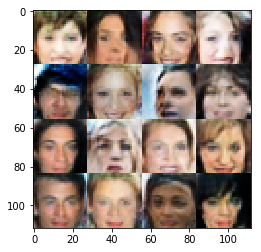

Epoch 0/1... Discriminator Loss: 1.1843... Generator Loss: 0.6005
Epoch 0/1... Discriminator Loss: 1.1899... Generator Loss: 0.5827
Epoch 0/1... Discriminator Loss: 1.1966... Generator Loss: 0.6786
Epoch 0/1... Discriminator Loss: 1.3137... Generator Loss: 0.5807
Epoch 0/1... Discriminator Loss: 1.3870... Generator Loss: 0.5532


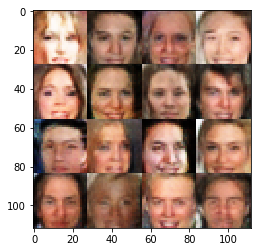

Epoch 0/1... Discriminator Loss: 1.3304... Generator Loss: 0.4827
Epoch 0/1... Discriminator Loss: 1.3497... Generator Loss: 0.4846
Epoch 0/1... Discriminator Loss: 1.4003... Generator Loss: 0.6667
Epoch 0/1... Discriminator Loss: 1.3017... Generator Loss: 0.4563
Epoch 0/1... Discriminator Loss: 1.3997... Generator Loss: 0.4732


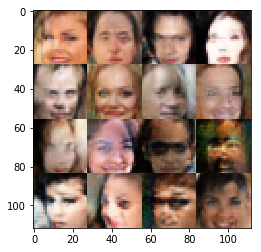

Epoch 0/1... Discriminator Loss: 1.1623... Generator Loss: 0.6225
Epoch 0/1... Discriminator Loss: 1.2173... Generator Loss: 0.6093
Epoch 0/1... Discriminator Loss: 1.7621... Generator Loss: 0.3786
Epoch 0/1... Discriminator Loss: 1.2204... Generator Loss: 0.6240
Epoch 0/1... Discriminator Loss: 1.0153... Generator Loss: 0.6997


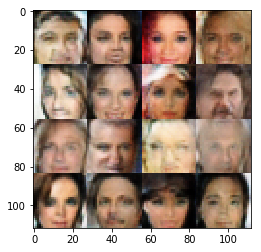

Epoch 0/1... Discriminator Loss: 1.4091... Generator Loss: 0.5460
Epoch 0/1... Discriminator Loss: 1.3637... Generator Loss: 0.6124
Epoch 0/1... Discriminator Loss: 1.1724... Generator Loss: 0.6511
Epoch 0/1... Discriminator Loss: 0.9786... Generator Loss: 0.9302
Epoch 0/1... Discriminator Loss: 1.2024... Generator Loss: 0.4858


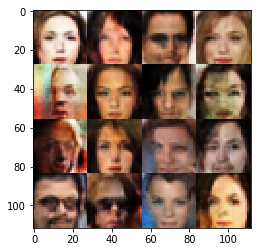

Epoch 0/1... Discriminator Loss: 1.3811... Generator Loss: 0.4235
Epoch 0/1... Discriminator Loss: 1.3333... Generator Loss: 0.4758
Epoch 0/1... Discriminator Loss: 1.3900... Generator Loss: 0.4689
Epoch 0/1... Discriminator Loss: 1.1975... Generator Loss: 0.6277
Epoch 0/1... Discriminator Loss: 1.4378... Generator Loss: 0.5030


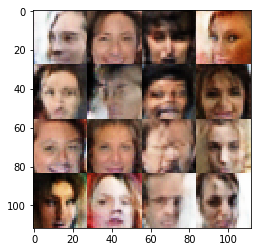

Epoch 0/1... Discriminator Loss: 1.3109... Generator Loss: 0.5592
Epoch 0/1... Discriminator Loss: 1.1112... Generator Loss: 0.7519
Epoch 0/1... Discriminator Loss: 1.3641... Generator Loss: 0.5880
Epoch 0/1... Discriminator Loss: 1.4727... Generator Loss: 0.3827
Epoch 0/1... Discriminator Loss: 1.2490... Generator Loss: 0.7284


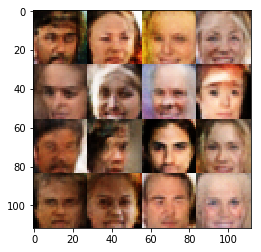

Epoch 0/1... Discriminator Loss: 1.1458... Generator Loss: 0.7019
Epoch 0/1... Discriminator Loss: 1.2054... Generator Loss: 0.6002
Epoch 0/1... Discriminator Loss: 1.0877... Generator Loss: 0.9121
Epoch 0/1... Discriminator Loss: 1.3674... Generator Loss: 0.4841
Epoch 0/1... Discriminator Loss: 1.2535... Generator Loss: 0.5978


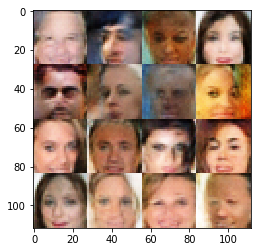

Epoch 0/1... Discriminator Loss: 1.5305... Generator Loss: 0.3448
Epoch 0/1... Discriminator Loss: 0.8590... Generator Loss: 0.9685
Epoch 0/1... Discriminator Loss: 1.2235... Generator Loss: 0.6487
Epoch 0/1... Discriminator Loss: 1.0344... Generator Loss: 0.6390
Epoch 0/1... Discriminator Loss: 1.7067... Generator Loss: 0.2753


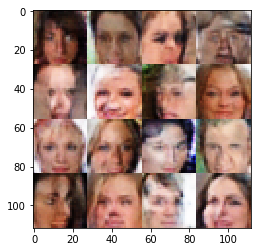

Epoch 0/1... Discriminator Loss: 1.2776... Generator Loss: 0.5484
Epoch 0/1... Discriminator Loss: 0.9196... Generator Loss: 1.0927
Epoch 0/1... Discriminator Loss: 1.0914... Generator Loss: 0.6361
Epoch 0/1... Discriminator Loss: 1.2756... Generator Loss: 0.5583
Epoch 0/1... Discriminator Loss: 1.2355... Generator Loss: 0.6867


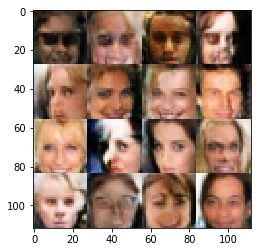

Epoch 0/1... Discriminator Loss: 1.3787... Generator Loss: 0.5778
Epoch 0/1... Discriminator Loss: 1.5116... Generator Loss: 0.3714
Epoch 0/1... Discriminator Loss: 1.0131... Generator Loss: 0.7792
Epoch 0/1... Discriminator Loss: 1.1601... Generator Loss: 0.5641
Epoch 0/1... Discriminator Loss: 0.8734... Generator Loss: 0.8121


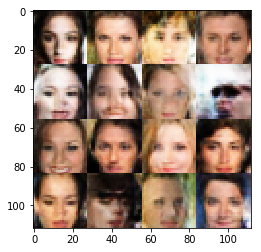

Epoch 0/1... Discriminator Loss: 1.5345... Generator Loss: 0.4662
Epoch 0/1... Discriminator Loss: 1.0865... Generator Loss: 0.7551
Epoch 0/1... Discriminator Loss: 1.5604... Generator Loss: 0.3971
Epoch 0/1... Discriminator Loss: 1.4521... Generator Loss: 0.5557
Epoch 0/1... Discriminator Loss: 0.9486... Generator Loss: 0.7782


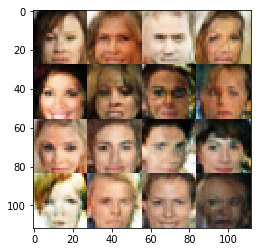

Epoch 0/1... Discriminator Loss: 1.3835... Generator Loss: 0.4520
Epoch 0/1... Discriminator Loss: 1.0742... Generator Loss: 0.8501
Epoch 0/1... Discriminator Loss: 1.3847... Generator Loss: 0.4416
Epoch 0/1... Discriminator Loss: 1.1685... Generator Loss: 0.5974
Epoch 0/1... Discriminator Loss: 1.1584... Generator Loss: 0.7700


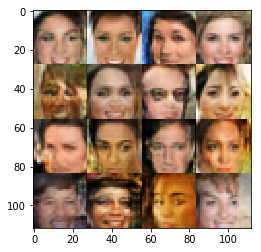

Epoch 0/1... Discriminator Loss: 1.4993... Generator Loss: 0.3840
Epoch 0/1... Discriminator Loss: 1.2917... Generator Loss: 0.6332
Epoch 0/1... Discriminator Loss: 1.1665... Generator Loss: 0.6669
Epoch 0/1... Discriminator Loss: 0.9670... Generator Loss: 0.7487


In [15]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.